<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-2linies.png", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos</p>
<p style="margin: 0; text-align:right;">2023-1 · Máster universitario en Ciencia de datos (<i>Data science</i>)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# PEC 3: Métodos supervisados

En esta práctica veremos diferentes métodos supervisados y trataremos de optimizar diferentes métricas. Veremos como los diferentes modelos clasifican los puntos y con cuales obtenemos mayor precisión. Después aplicaremos todo lo que hemos aprendido hasta ahora a un dataset nuevo simulando un caso práctico real.

1. [Exploración de algoritmos supervisados](#eje1) \
    1.0. Carga de datos \
    1.1. Naive-Bayes\
    1.2. Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)\
    1.3. K vecinos más próximos (KNN)\
    1.4. Máquinas de soporte vectorial (SVM)\
    1.5. Árboles de decisión
2. [Implementación del caso práctico](#ej2)\
    2.0. Carga de datos\
    2.1. Análisis Exploratorio de Datos\
    2.2. Preprocesamiento de Datos\
    2.3. Modelización\
    2.4. Ajuste de Hiperparámetros


<u>Consideraciones generales</u>:

- La solución planteada no puede utilizar métodos, funciones o parámetros declarados **_deprecated_** en futuras versiones, a excepción de la carga de datos cómo se indica posteriormente.
- Esta PEC debe realizarse de forma **estrictamente individual**. Cualquier indicio de copia será penalizado con un suspenso (D) para todas las partes implicadas y la posible evaluación negativa de la asignatura de forma íntegra.
- Es necesario que el estudiante indique **todas las fuentes** que ha utilizado para la realización de la PEC. De no ser así, se considerará que el estudiante ha cometido plagio, siendo penalizado con un suspenso (D) y la posible evaluación negativa de la asignatura de forma íntegra.

<u>Formato de la entrega</u>:

- Algunos ejercicios pueden suponer varios minutos de ejecución, por lo que la entrega debe hacerse en **formato notebook** y en **formato html**, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a HTML desde el menú File $\to$ Download as $\to$ HTML.
- Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de la actividad. Para cambiar el tipo de celda a este tipo, en el menú: Cell $\to$ Cell Type $\to$ Markdown.
- **Para una mayor visualización, se sugiere que el análisis se responda dentro de las celdas de color verde.**

<div class="alert alert-block alert-info">
    <strong>Nombre y apellidos: JUAN LARA CHUPS </strong>
</div>

In [1]:
!pip install tensorflow
!pip install scikeras
!pip install imbalanced-learn


In [19]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

# Librerias extras usadas en los ejercicios:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

%matplotlib inline


<a id='ej1'></a>
# 1. Exploración de Algoritmos Supervisados (5 puntos)

## 1.0 Carga de Datos

Vamos a trabajar con el conjunto de datos "Spiral", un conjunto sintético ampliamente utilizado en el aprendizaje automático y la minería de datos para problemas de clasificación no lineales. Este conjunto se compone de dos espirales entrelazadas, similares a las espirales de Arquímedes, donde cada punto está uniformemente distribuido en el plano y etiquetado con una de dos clases.

Tu tarea en esta sección es aplicar un algoritmo de clasificación para predecir la clase de un punto desconocido basándote en sus coordenadas (x, y). Este desafío es interesante debido a la naturaleza no lineal de las espirales entrelazadas, lo que pone a prueba los algoritmos de aprendizaje automático.

Sigue estos pasos:

1. Utiliza el código provisto para cargar 2000 puntos en la variable `X` y sus correspondientes etiquetas o grupos (en forma numérica) en la variable `y`.
2. Confirma que la carga de datos ha sido exitosa. Para ello, verifica las dimensiones de `X` y `y`.
3. Visualiza el gráfico de los puntos, utilizando colores distintos para cada grupo, para tener una representación visual clara del conjunto de datos."

Dimensiones de X (2000, 2)
Dimensiones de y (2000,)


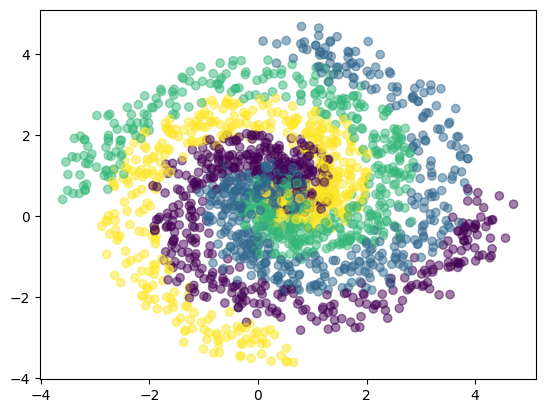

In [6]:
data = pd.read_pickle('spiral.pickle')

# Convertir las dos primeras columnas en un array de numpy
X = data[['X1', 'X2']].values

# Convertir la última columna en un array de numpy
y = data['y'].values

print('Dimensiones de X', X.shape)
print('Dimensiones de y', y.shape)

# Hacer la representación gráfica
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.viridis, alpha=0.5)
plt.show()

A lo largo de los ejercicios, aprenderas a visualizar gráficamente las fronteras de decisión generadas por diferentes modelos. Para lograr esto, utilizaremos la función definida a continuación, que sigue los siguientes pasos:

1. Crea una [malla](https://docs.scipy.org/doc/numpy/reference/generated/numpy.meshgrid.html) (meshgrid) usando los valores mínimos y máximos de 'x' e 'y'.
2. Realiza predicciones del clasificador utilizando los valores de esta malla.
3. Redimensiona (_reshape_) los datos para que tengan el formato adecuado.

Una vez completados estos pasos, estaremos listos para generar el gráfico de las fronteras de decisión y superponer los puntos reales. Así, podremos observar las áreas que el modelo identifica como pertenecientes a una clase específica y aquellas que considera de otra. Al superponer los puntos reales, evaluaré cómo el modelo clasifica correctamente los puntos en las áreas correspondientes.

En general, visualizar las fronteras de decisión me proporcionará una comprensión visual del rendimiento del modelo.

In [4]:
def plot_decision_boundary(clf, X, Y, cmap='Paired'):
    if not isinstance(X, np.ndarray):  # Si X no es un array de numpy, lo convierte
        X = X.to_numpy()

    h = 0.02
    x_min, x_max = X[:,0].min() - 10*h, X[:,0].max() + 10*h
    y_min, y_max = X[:,1].min() - 10*h, X[:,1].max() + 10*h
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7,7))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.25)
    plt.contour(xx, yy, Z, colors='k', linewidths=0.7)
    plt.scatter(X[:,0], X[:,1], c=Y, cmap=cmap, edgecolors='k', label=Y);

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Divide el _dataset_ en dos subconjuntos: __*train*__ y __*test*__. Asigna el 80% de los datos al conjunto de entrenamiento (__*train*__) y el 20% al conjunto de prueba (__*test*__). Nombra los conjuntos como `X_train`, `X_test`, `y_train` y `y_test`, asegurándote de utilizar la opción `random_state = 24` para garantizar la reproducibilidad de los resultados.

Para realizar esta división, emplea la función `train_test_split` de la biblioteca `sklearn`.

Recuerda que es esencial dividir el conjunto de datos en conjuntos de entrenamiento y prueba. Esta división es crucial para evaluar el rendimiento de tu modelo de manera efectiva y fiable. Así podrás entender cómo se comportará el modelo con datos nuevos y no vistos durante su entrenamiento.
    </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [7]:
# Dividir el dataset:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=24)

## 1.1. Gaussian Naïve Bayes

El propósito de este primer ejercicio es comprender el funcionamiento del algoritmo Naïve-Bayes, un algoritmo peculiar que se basa en el teorema de Bayes para calcular la probabilidad de que una observación pertenezca a cada una de las clases. Este modelo asume que las características de entrada son independientes entre sí, lo que permite simplificar el cálculo de las probabilidades condicionales.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. **Entrena un Modelo de Naïve-Bayes:** Utiliza el conjunto de datos de _train_ para entrenar un modelo de Naïve-Bayes. Emplea el clasificador `GaussianNB` de la biblioteca `sklearn` para este fin.

2. **Calcula el _Accuracy_ del Modelo:** Una vez entrenado el modelo, calcula su precisión (_accuracy_) tanto en el conjunto de _train_ como en el de _test_. Esto te permitirá evaluar qué tan bien está funcionando tu modelo.

3. **Calcula la Matriz de Confusión:** Utiliza el conjunto de _test_ para calcular la matriz de confusión del modelo. Esta matriz te ayudará a entender de mejor manera los aciertos y errores de tu clasificador.

4. **Representa Gráficamente la Frontera de Decisión:** Finalmente, visualiza la frontera de decisión del modelo utilizando el conjunto de _test_. Puedes hacer esto con la ayuda de la función `plot_decision_boundary` que ya has creado previamente.

Para realizar estos cálculos y visualizaciones, utiliza las funciones `accuracy_score` y `confusion_matrix` del paquete `metrics` de `sklearn`.

</div>


<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrena un Modelo de Naïve-Bayes:

mod_naive = GaussianNB()
mod_naive.fit(X_train, y_train)

pred_train = mod_naive.predict(X_train)
pred_test = mod_naive.predict(X_test)

In [ ]:
# 2. Calcula el accuracy del modelo train y test:

train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 29.88%
accuracy de test: 26.75%


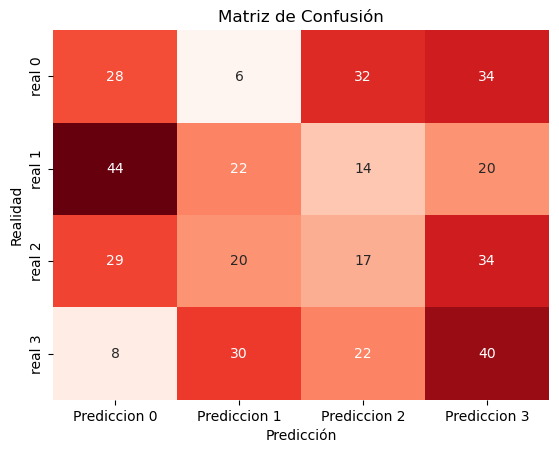

In [ ]:
# 3. Calcula la Matriz de Confusión

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

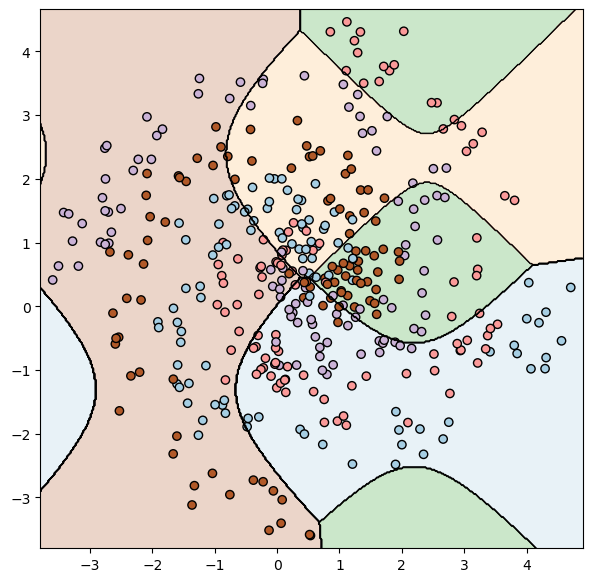

In [ ]:
# 4. Representa Gráficamente la Frontera de Decisión:

plot_decision_boundary(mod_naive, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. **Analiza las Fronteras de Decisión:** Observa y describe cómo son las fronteras de decisión obtenidas. Reflexiona y responde: ¿Tiene sentido que las fronteras tengan esta forma considerando el algoritmo de Naïve-Bayes que has utilizado? Fundamenta tu respuesta con base en las características y suposiciones del algoritmo.

2. **Evalúa las Predicciones en el Conjunto de Test:** Examina cómo son las predicciones que el modelo ha realizado sobre el conjunto de test. Discute la efectividad del modelo y cualquier patrón o tendencia que observes en las predicciones. Considera aspectos como la precisión, la matriz de confusión, y cualquier otro factor relevante que hayas notado durante la implementación.
</div>

Respuesta de Analiza las Fronteras de Decisión:

Entendiendo el algoritmo de Bayes con varios ejemplos practicos y teoricos contrastados con diferentes fuentes se puede decir lo siguiente:

La fronteras de decisiones tienen formas extrañas, curvas en sus limites. Esto se debe a que el algoritmo de Bayes mantiene la suposicion de que las variables explicativas son independientes entre si, ademas de la distribucion normal de las mismas.

Como la naturaleza de los datos tienen forma de espiral tiene sentido que la frontera de decision presente esta forma.

Añadir que cada frontera de color representa cada unos de los valores a predecir de entre (0,1,2,3)


Respuesta de Evalúa las Predicciones en el Conjunto de Test:

El nivel de accuracy tanto en el conjunto test y train es muy bajo no llegando al 30%.

Observando la matriz de confusion del conjunto podemos ver que se clasifican incorrectamente demasiados valores. Esto se debe a que el algoritmo no se ajusta a las caracteristicas necesarias para poder implementar este algoritmo en el conjunto de datos.

Bibliografia:

https://medium.com/datos-y-ciencia/algoritmos-naive-bayes-fudamentos-e-implementaci%C3%B3n-4bcb24b307f

https://aprendeia.com/algoritmo-naive-bayes-machine-learning/

https://www.youtube.com/watch?v=949tYJgRvRg


### 1.2 Análisis Discriminante Lineal (LDA) y Análisis Discriminante Cuadrtático (QDA)

Ahora, analizarás dos algoritmos que se basan en la transformación lineal de las características de entrada para maximizar la separación entre las clases. Estos modelos operan bajo la suposición de que las características siguen una distribución gaussiana. Esto te permitirá calcular las probabilidades condicionales de cada clase. Con estos cálculos, asignarás a cada observación la clase que presente la mayor probabilidad condicional.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos con el dataset de entrenamiento (_train_):    
    
1. Entrena un modelo de Análisis Discriminante Lineal (LDA) utilizando el clasificador `LinearDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Estas acciones te ayudarán a evaluar la eficacia del modelo LDA en tu conjunto de datos y a entender mejor cómo clasifica las observaciones.

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrenar el modelo

modelo_LDA = LinearDiscriminantAnalysis()
modelo_LDA.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_LDA.predict(X_train)
pred_test = modelo_LDA.predict(X_test)

In [ ]:
# 2. Calcucular el accuracy

train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 25.62%
accuracy de test: 22.50%


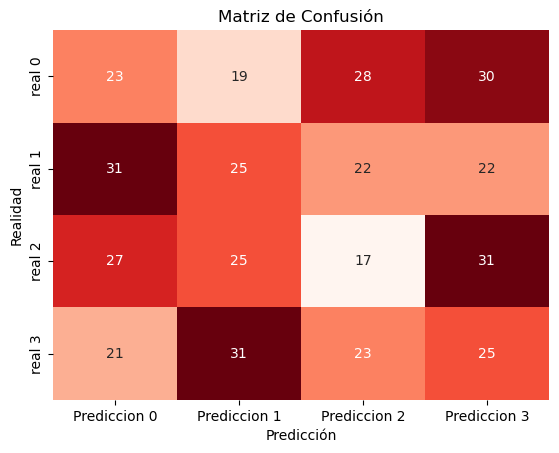

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

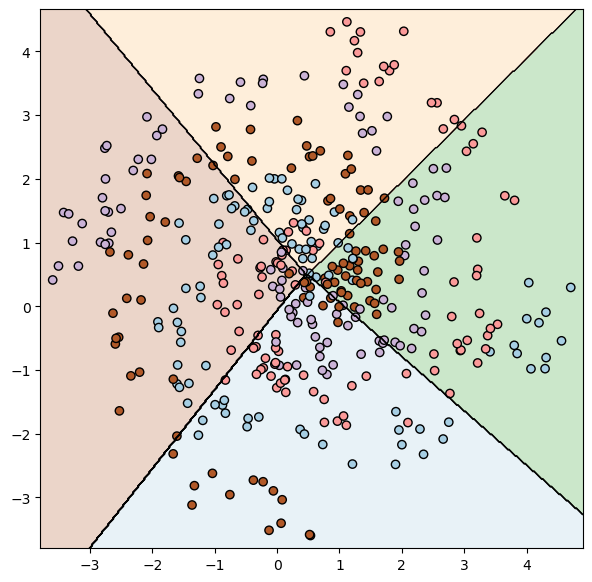

In [ ]:
plot_decision_boundary(modelo_LDA, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Observa las fronteras de decisión que has generado. Reflexiona sobre su forma: ¿Se ajustan a lo que esperarías del algoritmo de Análisis Discriminante Lineal (LDA)? Considera la naturaleza lineal del algoritmo y cómo esto influye en la forma de las fronteras.
2. Evalúa las predicciones realizadas sobre el conjunto de test. Analiza su precisión y cómo se distribuyen respecto a las fronteras de decisión. ¿Son coherentes estas predicciones con lo que observas en las fronteras de decisión?

Estas reflexiones te permitirán comprender mejor la efectividad del modelo LDA y su adecuación para el conjunto de datos con el que estás trabajando."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

Podemos observar que la frontera de decision lineales, esto se espera debido al algoritmo utilizado que dividen el hiperplano en 4 partes diferentes segun las variables a predecir.

La forma que tienen las fronteras se debe a las caracteristicas de los datos del conjunto.
    
Las predicciones son incluso peores que el modelo entrenado con Gaussianna Bayes con un accuracy de 22% y 25%. Esto se debe a que el algoritmo asume que las clases separadas en el hiperplano lineal por lo que, al tener forma de espiral, las fronteras de decision no seran capaces de realizar las predicciones correctamente.

Blibliografia:

    https://cienciadedatos.net/documentos/28_linear_discriminant_analysis_lda_y_quadratic_discriminant_analysis_qda
</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un modelo de Análisis Discriminante Cuadrático (QDA) usando el clasificador `QuadraticDiscriminantAnalysis` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Estos pasos te ayudarán a evaluar cómo el modelo QDA se comporta con tu conjunto de datos, y a entender su capacidad para clasificar y diferenciar entre las clases."

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrenar el modelo

modelo_QDA = QuadraticDiscriminantAnalysis()
modelo_QDA.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_QDA.predict(X_train)
pred_test = modelo_QDA.predict(X_test)

In [ ]:
# 2. Calcucular el accuracy

train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 26.81%
accuracy de test: 24.75%


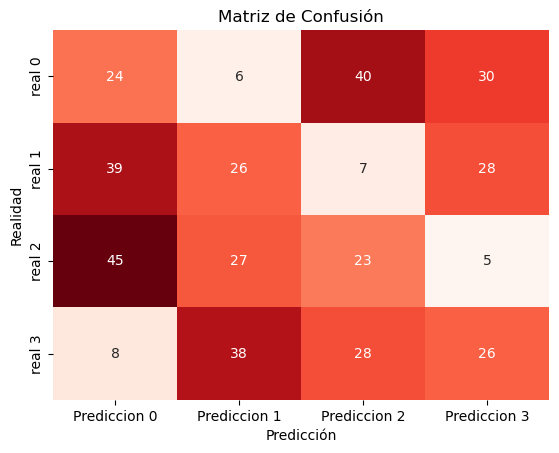

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

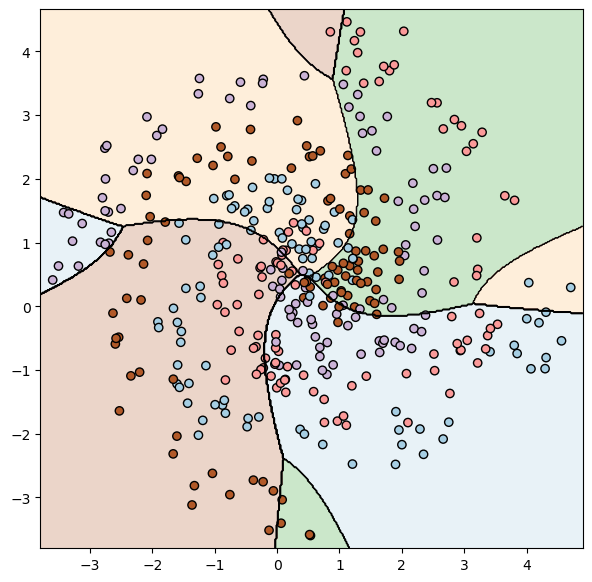

In [ ]:
plot_decision_boundary(modelo_QDA, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Examina las fronteras de decisión que has generado. Reflexiona sobre su forma: ¿Es coherente con lo que esperarías del algoritmo de Análisis Discriminante Cuadrático (QDA)? Considera cómo la naturaleza cuadrática del algoritmo podría influir en la forma de estas fronteras.
2. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con las fronteras observadas?
3. Reflexiona sobre las diferencias entre los algoritmos LDA y QDA. ¿En qué se distinguen en términos de supuestos, enfoque y resultados en tus datos?

Este análisis te permitirá comprender las características y la eficacia de ambos modelos, LDA y QDA, y cómo se aplican a tu conjunto de datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>
    
Las fronteras de decisión del algoritmo QDA son curvas redondeadas o no lineales esto se debe a que al realizar el calculo tiene en cuenta la covarianza de cada clase, permitiendo que las fronteras se ajusten a la forma específica de la distribución de cada clase. Esto tiene sentido, ya que los datos están dispuestos en una espiral, lo que significa que no hay una dirección en la que las clases estén completamente separadas.
    
Las predicciones siguen siendo pesimas no llegando al 26% en ninguno de los dos conjuntos.
    
Las diferencias de los dos algoritmo difieren en sus supuestos donde el LDA asume que todas las clases tienen la misma matriz de covarianzas y el QDA sume que las matrices de covarianzas son diferentes en cada clase.

En terminos de enfoque, el LDA encuentra la combinacion lineal de las variables descriptivas que maximiza la distancia entre las medias de las clases y en el QDA, encuentra lacombinacion como en el LDA pero teniendo en cuenta las diferentes matrices de covarianza.
    
En los datos los dos son inservibles por la naturaleza de los datos en espiral.


Bibliografia:
    
 https://rpubs.com/Cristina_Gil/389151
  

</div>

### 1.3. KNN

En este punto, vas a entender el funcionamiento del algoritmo KNN (K-Nearest-Neighbor), que se basa en la proximidad de los puntos de datos en un espacio de características. Analizarás sus ventajas y desventajas, y comprenderás cómo los parámetros que lo componen influyen en su comportamiento.

KNN es un algoritmo de tipo supervisado basado en instancia. Esto significa:

- Supervisado: Tu conjunto de datos de entrenamiento está etiquetado con la clase o resultado esperado.
- Basado en instancia (_Lazy Learning_): El algoritmo no aprende explícitamente un modelo, como en la Regresión Logística o los árboles de decisión. En cambio, memoriza las instancias de entrenamiento y las utiliza como "conocimiento" en la fase de predicción.

Para entender cómo funciona KNN, sigue estos pasos:

1. Calcula la distancia entre el ítem a clasificar y los demás ítems del dataset de entrenamiento.
2. Selecciona los "k" elementos más cercanos, es decir, aquellos con la menor distancia, según el tipo de distancia que utilices (euclídea, coseno, manhattan, etc).
3. Realiza una "votación de mayoría" entre los k puntos seleccionados: la clase que predomine en estos puntos decidirá la clasificación final del ítem analizado.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un clasificador KNN con el hiperparámetro `n_neighbors=2` usando el clasificador `KNeighborsClassifier` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Si al entrenar el clasificador aparece un aviso (warning) y deseas ignorarlo, ejecuta el siguiente código antes del entrenamiento:

`import warnings`
`warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)`"

Esto te permitirá evaluar la efectividad del modelo KNN con `n_neighbors=2` en tu conjunto de datos, y entender cómo se comporta en términos de clasificación y separación de clases.    
    
    
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
import warnings
warnings.filterwarnings('ignore', message='^.*will change.*$', category=FutureWarning)

In [ ]:
# 1. Entrenar el modelo

modelo_KNN = KNeighborsClassifier(n_neighbors=2)
modelo_KNN.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_KNN.predict(X_train)
pred_test = modelo_KNN.predict(X_test)

In [ ]:
# 2. Calcucular el accuracy

train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 87.25%
accuracy de test: 78.50%


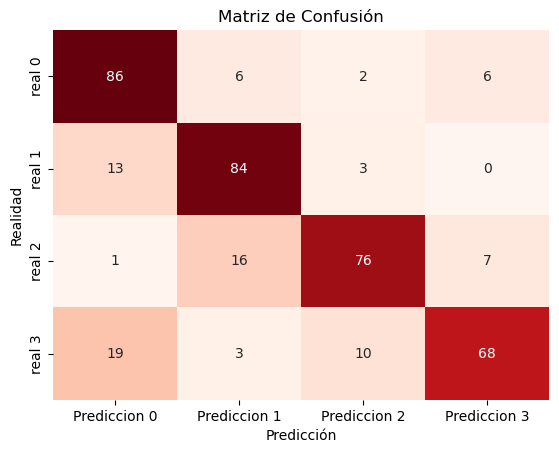

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

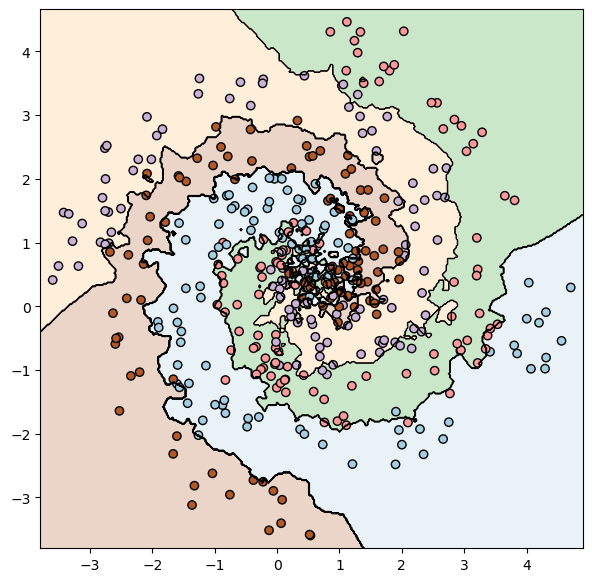

In [ ]:
plot_decision_boundary(modelo_KNN, X_test, y_test)

En el modelo que has entrenado, has fijado el parámetro `n_neighbors` de forma arbitraria. Sin embargo, es posible que con otro valor obtengas una mejor predicción. Para encontrar el valor óptimo de los parámetros de un modelo (_hyperparameter tunning_), a menudo se utiliza una búsqueda de rejilla (_grid search_). Esto implica entrenar un modelo para cada combinación posible de hiperparámetros y evaluarlo mediante validación cruzada (_cross validation_) con 5 particiones estratificadas. Luego, seleccionarás la combinación de hiperparámetros que haya obtenido los mejores resultados.

En este caso, te centrarás en optimizar un solo hiperparámetro:

- 𝑘: el número de vecinos que se consideran para clasificar un nuevo ejemplo. Debes probar con todos los valores entre 1 y 20.

Realiza este proceso para identificar el número óptimo de vecinos, lo que te permitirá mejorar la precisión de tus predicciones con el modelo KNN.

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

Para calcular el valor óptimo del hiperparámetro _k_ (`n_neighbors`), debes realizar una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar el valor óptimo de _k_. Para cada valor, calcula su promedio y la desviación estándar. Luego, implementa un _heatmap_ para visualizar la precisión según los diferentes valores del hiperparámetro.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular el mejor hiperparámetro. Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual el valor de _k_ que maximiza la precisión de tu modelo KNN."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión promedio: 75.06 +/- 1.99 con parámetros {'n_neighbors': 1}
Precisión promedio: 75.87 +/- 1.03 con parámetros {'n_neighbors': 2}
Precisión promedio: 77.12 +/- 1.69 con parámetros {'n_neighbors': 3}
Precisión promedio: 77.19 +/- 0.77 con parámetros {'n_neighbors': 4}
Precisión promedio: 77.75 +/- 1.18 con parámetros {'n_neighbors': 5}
Precisión promedio: 79.00 +/- 1.22 con parámetros {'n_neighbors': 6}
Precisión promedio: 78.13 +/- 1.31 con parámetros {'n_neighbors': 7}
Precisión promedio: 78.12 +/- 1.80 con parámetros {'n_neighbors': 8}
Precisión promedio: 78.19 +/- 1.46 con parámetros {'n_neighbors': 9}
Precisión promedio: 77.81 +/- 1.71 con parámetros {'n_neighbors': 10}
Precisión promedio: 77.31 +/- 1.20 con parámetros {'n_neighbors': 11}
Precisión promedio: 77.69 +/- 1.62 con parámetros {'n_neighbors': 12}
Precisión promedio: 78.00 +/- 1.38 con parámetros {'n_neighbors': 13}
Precisión promedio: 77.81 +/- 1.44 con parámetros {'n_neighbors': 14}
Precisión promedio: 78.38 +/-

<Axes: >

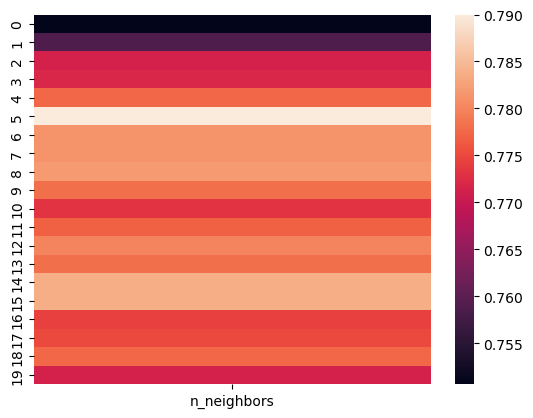

In [ ]:
# Definimos el espacio de búsqueda
modelo_KNN = KNeighborsClassifier()

param_grid = {"n_neighbors": range(1, 21)}
grid_search = GridSearchCV(modelo_KNN, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))


    best_params = grid_search.best_params_
print("El mejor valor de k es:", best_params["n_neighbors"])


sns.heatmap(pd.DataFrame(means, columns=['n_neighbors']))

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos con el dataset de entrenamiento (_train_):

1. Entrena un clasificador KNN utilizando el mejor hiperparámetro que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Este proceso te permitirá ver cómo el hiperparámetro óptimo que has identificado mejora la efectividad de tu modelo KNN en la clasificación de los datos.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrenar el modelo

modelo_KNN = KNeighborsClassifier(n_neighbors= 6)
modelo_KNN.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_KNN.predict(X_train)
pred_test = modelo_KNN.predict(X_test)

In [ ]:
# 2. Calcular el accuracy

train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 84.12%
accuracy de test: 82.00%


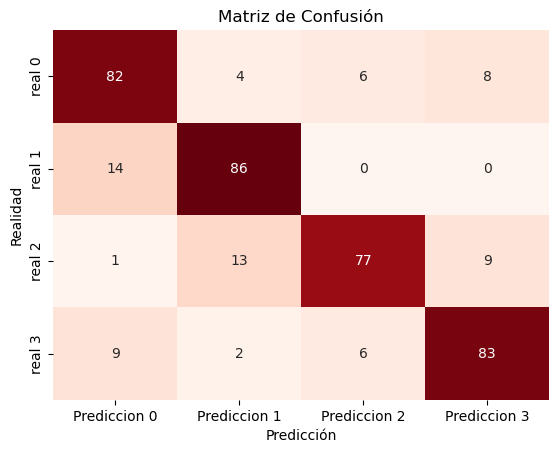

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

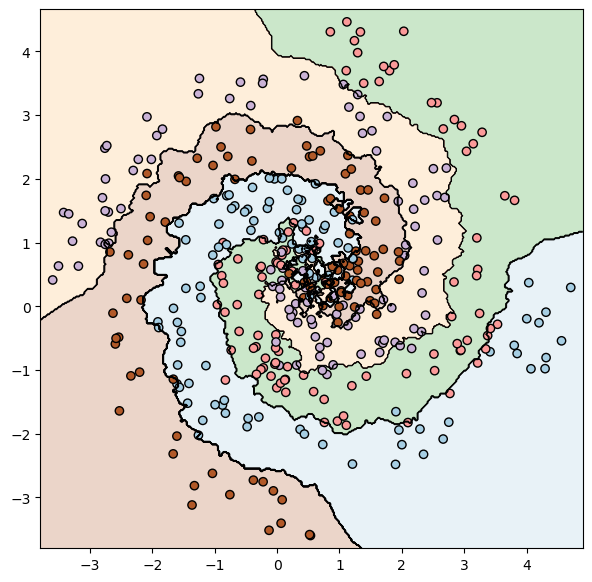

In [ ]:
plot_decision_boundary(modelo_KNN, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Comenta los resultados obtenidos en la búsqueda del mejor hiperparámetro. Reflexiona sobre cómo varió el rendimiento del modelo con los diferentes valores de `n_neighbors`.
2. Analiza cómo se visualiza gráficamente el cambio del valor de `n_neighbors`. ¿Observas alguna tendencia o patrón claro? ¿Es coherente esta diferencia entre los dos gráficos al cambiar el parámetro?
3. Examina las fronteras de decisión que has generado. ¿La forma de estas fronteras tiene sentido dado el algoritmo KNN utilizado? Piensa en cómo la elección del número de vecinos influye en la forma de la frontera.
4. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con lo que observas en las fronteras de decisión?

Este análisis te ayudará a comprender la eficacia del modelo KNN con diferentes configuraciones de `n_neighbors` y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>
    
Buscando el mejor hiperparametro se ha encontrado que el mejr valor de k en promedio es 6. Cambiando los valores en el modelo se ha encontrado que es peor en el conjunto de en comparacion con el accuracy pero los valores son altos ( superiores al 80 %).
    
Las fronteras de decision son mas robustas y tienen sentido debido a que el algoritmo KNN los que busca es la decision de las fronteras segun a los valores de sus vecinos, por lo que al tener los datos en espiral es posible que con k=2 obtenga mejor precison que con k = 6.
    

    



</div>

### 1.4. SVM

En esta sección, vas a explorar las Máquinas de Vectores de Soporte (SVM), que se basan en el concepto del _Maximal Margin Classifier_ y el hiperplano.

Un hiperplano en un espacio p-dimensional se define como un subespacio plano y afín de dimensiones p-1. En dos dimensiones, es una recta; en tres, un plano convencional. Para dimensiones mayores a tres, aunque no es intuitivo visualizarlo, el concepto se mantiene.

Cuando los casos son perfectamente separables de manera lineal, surgen infinitos posibles hiperplanos. Para seleccionar el clasificador óptimo, utiliza el concepto de _maximal margin hyperplane_, el hiperplano que se encuentra más alejado de todas las observaciones de entrenamiento. Este se define calculando la distancia perpendicular mínima (margen) de las observaciones a un hiperplano. El hiperplano óptimo es aquel que maximiza este margen.

En el proceso de optimización, debes tener en cuenta que solo las observaciones al margen o que lo violan (vectores soporte) influyen en el hiperplano. Estos vectores soporte son los que definen el clasificador.

#### Los _kernels_ en SVM

En situaciones donde no puedes encontrar un hiperplano que separe dos clases, es decir, cuando las clases no son linealmente separables, puedes utilizar el truco del núcleo (_kernel trick_). Este método te permite trabajar en una dimensión nueva donde es posible encontrar un hiperplano para separar las clases. Puedes ver un ejemplo en [este video](https://www.youtube.com/watch?v=OdlNM96sHio).

Al igual que con el KNN, las SVM también dependen de varios hiperparámetros. En este caso, te enfocarás en optimizar dos hiperparámetros:

1. **C**: la regularización, que es el valor de penalización de los errores en la clasificación. Este valor indica el compromiso entre obtener el hiperplano con el margen más grande posible y clasificar correctamente el máximo número de ejemplos. Debes probar los siguientes valores: 0.01, 0.1, 1, 10, 50, 100 y 200.
   
2. **Gama**: un coeficiente que multiplica la distancia entre dos puntos en el kernel radial. En términos simples, cuanto más pequeño sea gama, más influencia tendrán dos puntos cercanos. Debes probar los valores: 0.001, 0.01, 0.1, 1 y 10.

Para validar el rendimiento del algoritmo con cada combinación de hiperparámetros, utiliza la validación cruzada (_cross-validation_) con 4 particiones estratificadas."

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>


1. Calcula el valor óptimo de los hiperparámetros _C_ y _gama_ utilizando una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar los valores óptimos.
2. Para cada combinación de valores, calcula su promedio y la desviación estándar.
3. Haz un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular los mejores hiperparámetros con el clasificador SVC (de `SVM` de `sklearn`). Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual los valores de _C_ y _gama_ que maximizan la precisión de tu modelo SVM.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

Precisión promedio: 25.50 +/- 0.61 con parámetros {'C': 0.01, 'gamma': 0.001}
Precisión promedio: 25.62 +/- 0.80 con parámetros {'C': 0.01, 'gamma': 0.01}
Precisión promedio: 30.37 +/- 1.63 con parámetros {'C': 0.01, 'gamma': 0.1}
Precisión promedio: 74.00 +/- 2.19 con parámetros {'C': 0.01, 'gamma': 1}
Precisión promedio: 75.06 +/- 0.62 con parámetros {'C': 0.01, 'gamma': 10}
Precisión promedio: 25.50 +/- 0.61 con parámetros {'C': 0.1, 'gamma': 0.001}
Precisión promedio: 25.38 +/- 0.72 con parámetros {'C': 0.1, 'gamma': 0.01}
Precisión promedio: 49.06 +/- 1.01 con parámetros {'C': 0.1, 'gamma': 0.1}
Precisión promedio: 78.81 +/- 1.64 con parámetros {'C': 0.1, 'gamma': 1}
Precisión promedio: 78.00 +/- 1.69 con parámetros {'C': 0.1, 'gamma': 10}
Precisión promedio: 25.69 +/- 0.37 con parámetros {'C': 1, 'gamma': 0.001}
Precisión promedio: 28.00 +/- 1.83 con parámetros {'C': 1, 'gamma': 0.01}
Precisión promedio: 73.56 +/- 2.24 con parámetros {'C': 1, 'gamma': 0.1}
Precisión promedio: 79.

<Axes: xlabel='gamma', ylabel='C'>

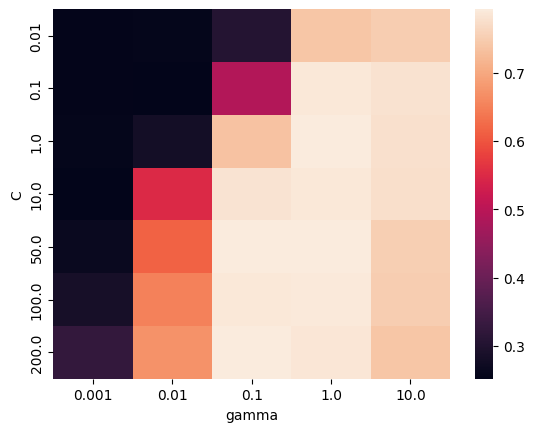

In [8]:
modelo_svc =SVC()


param_grid = {"C": [0.01, 0.1, 1, 10, 50, 100, 200],
              "gamma": [0.001, 0.01, 0.1, 1, 10]}

grid_search = GridSearchCV(modelo_svc, param_grid=param_grid, cv=4)

grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']


for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

param1 = [x['C'] for x in params]
param2 = [x['gamma'] for x in params]

precisions = pd.DataFrame(zip(param1, param2, means),
                          columns=['C', 'gamma', 'means'])

precisions = precisions.pivot(index='C', columns='gamma', values='means')
sns.heatmap(precisions)

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Realiza los siguientes pasos con el dataset de entrenamiento (_train_):

1. Entrena un modelo SVM utilizando la mejor combinación de parámetros que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.

Este proceso te permitirá ver cómo la mejor combinación de parámetros mejora la efectividad de tu modelo SVM en la clasificación de los datos.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [14]:
modelo_svc = SVC(C=50, gamma=1)
modelo_svc.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_svc.predict(X_train)
pred_test = modelo_svc.predict(X_test)

In [17]:
train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 82.62%
accuracy de test: 84.25%


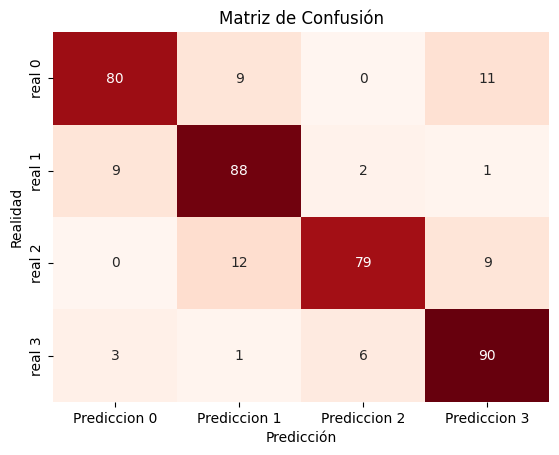

In [20]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

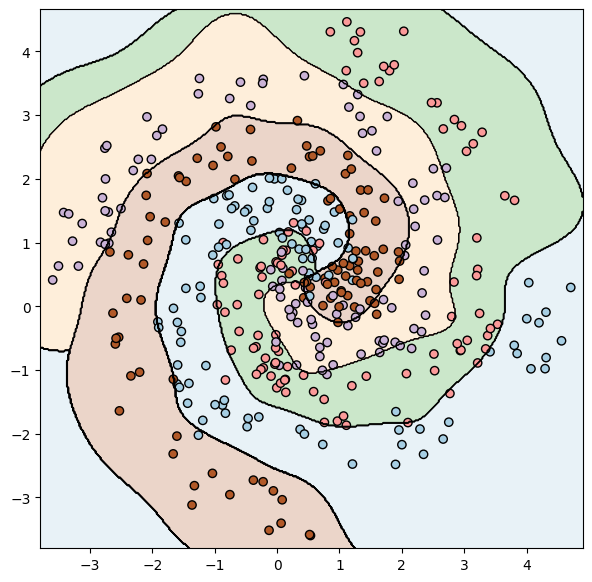

In [22]:
plot_decision_boundary(modelo_svc, X_test, y_test)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Comenta los resultados obtenidos en la búsqueda de los mejores hiperparámetros. Reflexiona sobre cómo varió el rendimiento del modelo SVM con los diferentes valores de _C_ y _gama_. Considera si los valores óptimos encontrados tienen sentido en el contexto de tu conjunto de datos.
2. Examina las fronteras de decisión que has generado con el modelo SVM. ¿La forma de estas fronteras es coherente con lo que esperarías del algoritmo utilizado? Piensa en cómo la combinación de hiperparámetros seleccionados podría influir en la forma de las fronteras.
3. Evalúa las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son estas predicciones consistentes con lo que observas en las fronteras de decisión?

Este análisis te ayudará a comprender la eficacia del modelo SVM con los hiperparámetros seleccionados y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

La mejor combinacion de valores es C = 1 y gamma = 50 aunque existe otra combinacion se ha elegido esta devido a que su desviacion es menor.

Las fronteras de decision presentan curvas como espirales debido a la naturaleza de nuestros datos.

El nivel de accuracy de nuestro modelo es elevado llegando a superar en el test al entrenamiento (85% y 83%)

</div>

### 1.5. Árboles de decisión

En esta sección, vas a explorar los árboles de decisión, modelos predictivos que se basan en reglas binarias (si/no) para clasificar las observaciones según sus atributos y predecir el valor de la variable respuesta. Estos árboles pueden ser clasificadores, como en tu ejemplo, o regresores para predecir variables continuas.

#### Construcción de un Árbol

Para construir un árbol, sigue el algoritmo de *recursive binary splitting*:

1. Comienza en la parte superior del árbol, donde todas las observaciones pertenecen a la misma región.
2. Identifica todos los posibles puntos de corte para cada uno de los predictores. Estos puntos de corte son los diferentes niveles de los predictores.
3. Evalúa las posibles divisiones para cada predictor utilizando una medida específica. En los clasificadores, estas medidas pueden ser el *classification error rate*, el índice Gini, la entropía o el chi-square.

Comprender estos pasos te ayudará a entender cómo los árboles de decisión crean divisiones binarias para clasificar los datos y cómo estos pueden aplicarse tanto para clasificación como para regresión.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Sigue estos pasos:

1. Con el dataset de entrenamiento (_train_), entrena un árbol de decisión utilizando el clasificador `DecisionTreeClassifier` de la biblioteca `tree` de `sklearn`.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.
5. Representa el árbol de decisión. Puedes utilizar el comando `plot.tree` de la biblioteca `tree` de `sklearn`.

Estos pasos te permitirán evaluar cómo el árbol de decisión se comporta en tu conjunto de datos, tanto en términos de clasificación como en su representación visual."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrenar el modelo

modelo_arbol = DecisionTreeClassifier()
modelo_arbol.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_arbol.predict(X_train)
pred_test = modelo_arbol.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 100.00%
accuracy de test: 74.00%


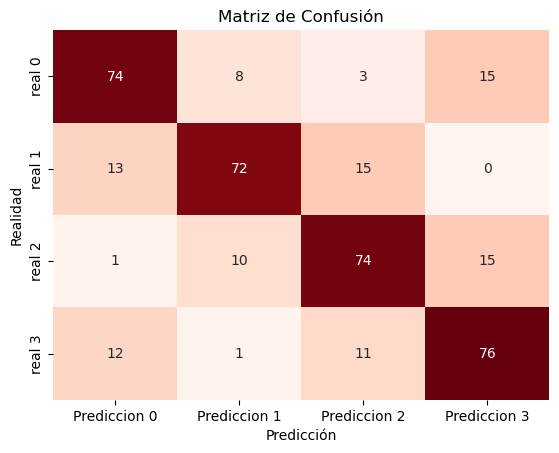

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

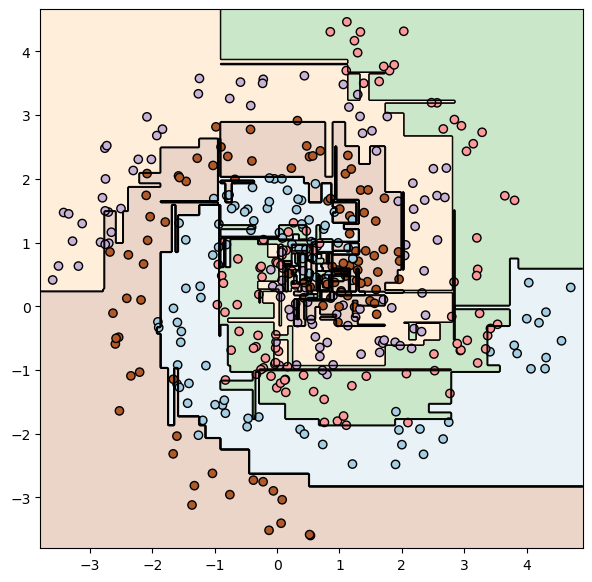

In [ ]:
plot_decision_boundary(modelo_arbol, X_test, y_test)

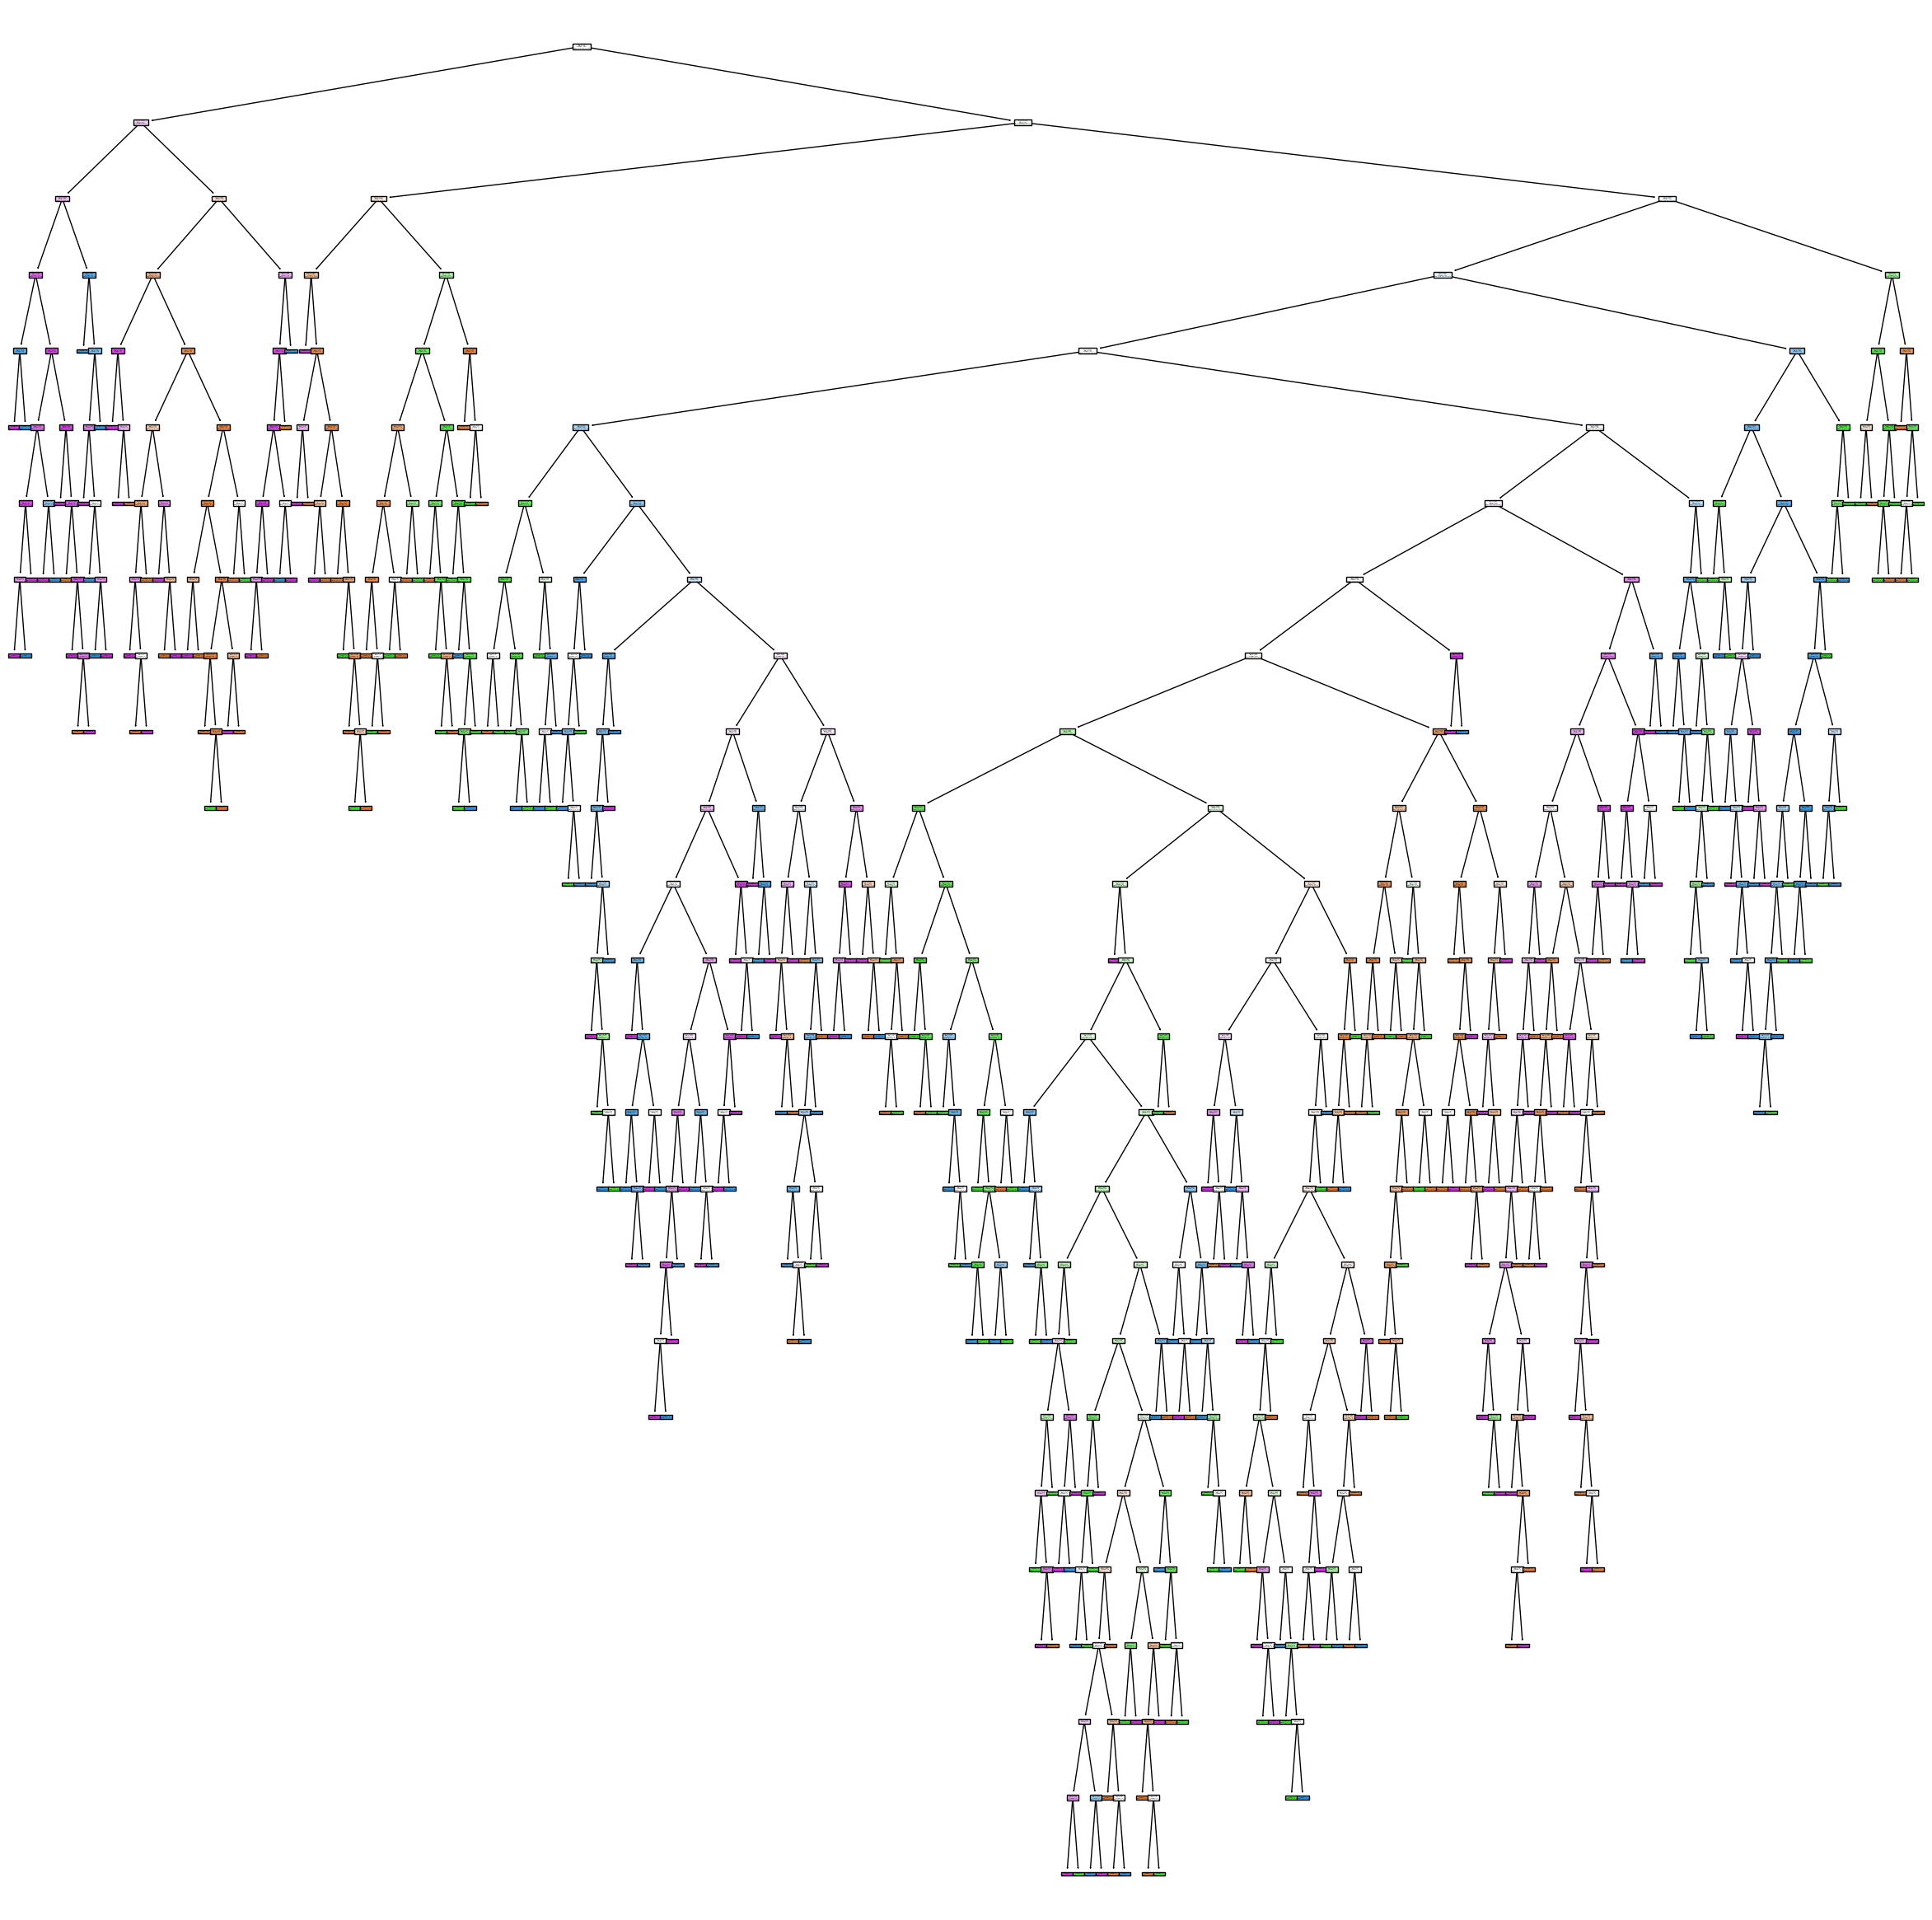

In [ ]:
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(modelo_arbol,filled=True)
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa y comenta los resultados obtenidos con el árbol de decisión. Considera tanto el _accuracy_ del modelo en los conjuntos de _train_ y _test_ como los resultados de la matriz de confusión.
2. Reflexiona sobre cómo la frontera de decisión visualizada en el conjunto de _test_ se alinea con los resultados obtenidos. ¿Es coherente con lo que esperarías de un árbol de decisión?
3. Observa la representación gráfica del árbol. Analiza cómo las diferentes ramificaciones y decisiones tomadas en el árbol explican el comportamiento del modelo y su impacto en la clasificación de los datos.

Este análisis te ayudará a comprender en profundidad el funcionamiento y la eficacia del árbol de decisión en tu conjunto de datos específico."

</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

Podemos observar como en el conjunto de entrenamiento el modelo llega al 100% de los casos pero en el conjunto de test llega al 12%. Esto se puede deber a que el modelo en el trenamiento identifica patrones que en el test no puedo llevar a cabo por lo que se trata de un caso de overfittting.
    
Debido a la naturaleza de los arboles de decision, la frontera de decision se ver reflejado como irregular mezclando y separando el plano. Esto se debe a que el arbol se fundamenta en separar los datos segun sus caracteristicas en dos cada vez que se va adentrando en cada nivel de seleccion hasta llegar al optimo.
    
El arbol de decision que muestran estos datos es bastante grande y complejo, esto se debe a la naturaleza de espiral que presentan los datos, por lo que cada vez que explora las relaciones entre las variables descriptivas y final se encuentran con datos nuevos que estudiar hasta llegar a la conclusion.

</div>

#### Evitando el *overfitting*

El proceso de construcción de árboles descrito tiende a reducir rápidamente el error de entrenamiento, por lo que generalmente el modelo se ajusta muy bien a las observaciones utilizadas como entrenamiento (conjunto de *train*). Como consecuencia, los árboles de decisión tienden al *overfitting*.
   
Para evitar el *overfitting* en los árboles de decisión, es crucial que modifiques ciertos hiperparámetros del modelo. Aquí te explico cómo hacerlo:

1. Utiliza el hiperparámetro `max_depth`, que define la profundidad máxima del árbol. Deberás explorar los valores entre 4 y 10 para encontrar el equilibrio adecuado entre la complejidad del modelo y su capacidad para generalizar.
2. Establece el hiperparámetro `min_samples_split`, que es el número mínimo de observaciones que debe tener una hoja del árbol antes de considerar una división. Experimenta con valores como 2, 10, 20, 50 y 100 para asegurarte de que el árbol no se vuelva demasiado específico para las observaciones de entrenamiento.

Ajustando estos hiperparámetros, podrás controlar la tendencia del árbol de decisión a sobreajustarse al conjunto de entrenamiento, mejorando así su capacidad para realizar predicciones efectivas en nuevos datos."

<div class="alert alert-block alert-info">
    <strong>Implementación:</strong>

1. Calcula el valor óptimo de los hiperparámetros `max_depth` y `min_samples_split` utilizando una búsqueda de rejilla con validación cruzada. Este proceso te ayudará a encontrar los valores óptimos que evitarán el sobreajuste.
2. Para cada combinación de valores, calcula su promedio y la desviación estándar.
3. Haz un _heatmap_ para visualizar la precisión según los diferentes valores de los hiperparámetros.

Utiliza el módulo `GridSearchCV` de `sklearn` para calcular los mejores hiperparámetros con el clasificador `DecisionTreeClassifier` de `tree` de `sklearn`. Para la visualización del _heatmap_, emplea la librería `Seaborn`.

Estos pasos te permitirán identificar de manera efectiva y visual los valores de `max_depth` y `min_samples_split` que maximizan la precisión de tu árbol de decisión, minimizando el riesgo de sobreajuste.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:

modelo_arbol = DecisionTreeClassifier()

param_grid = {"max_depth": range(4, 10), "min_samples_split": [2, 10, 20, 50, 100]}

grid_search = GridSearchCV(modelo_arbol, param_grid=param_grid, cv=4)
grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

Precisión promedio: 46.69 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 2}
Precisión promedio: 46.69 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 10}
Precisión promedio: 46.56 +/- 2.17 con parámetros {'max_depth': 4, 'min_samples_split': 20}
Precisión promedio: 45.75 +/- 1.94 con parámetros {'max_depth': 4, 'min_samples_split': 50}
Precisión promedio: 43.56 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 100}
Precisión promedio: 52.81 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 2}
Precisión promedio: 52.81 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 10}
Precisión promedio: 52.69 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 20}
Precisión promedio: 51.19 +/- 4.07 con parámetros {'max_depth': 5, 'min_samples_split': 50}
Precisión promedio: 48.31 +/- 3.68 con parámetros {'max_depth': 5, 'min_samples_split': 100}
Precisión promedio: 57.44 +/- 6.08 con parámetros {'max_depth': 6, 'min_samples_

Precisión promedio: 46.69 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 2}
Precisión promedio: 46.69 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 10}
Precisión promedio: 46.56 +/- 2.17 con parámetros {'max_depth': 4, 'min_samples_split': 20}
Precisión promedio: 45.75 +/- 1.94 con parámetros {'max_depth': 4, 'min_samples_split': 50}
Precisión promedio: 43.56 +/- 2.15 con parámetros {'max_depth': 4, 'min_samples_split': 100}
Precisión promedio: 52.69 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 2}
Precisión promedio: 52.81 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 10}
Precisión promedio: 52.69 +/- 4.42 con parámetros {'max_depth': 5, 'min_samples_split': 20}
Precisión promedio: 51.19 +/- 4.07 con parámetros {'max_depth': 5, 'min_samples_split': 50}
Precisión promedio: 48.31 +/- 3.68 con parámetros {'max_depth': 5, 'min_samples_split': 100}
Precisión promedio: 57.50 +/- 6.09 con parámetros {'max_depth': 6, 'min_samples_

<Axes: xlabel='min_samples_split', ylabel='max_depth'>

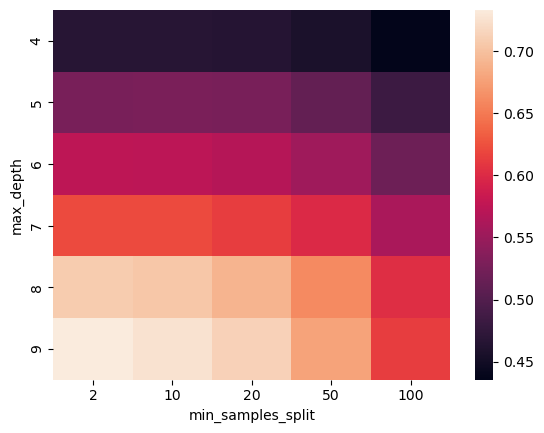

In [ ]:

modelo_arbol = DecisionTreeClassifier()

param_grid = {"max_depth": range(4, 10),
              "min_samples_split": [2, 10, 20, 50, 100]}

grid_search = GridSearchCV(modelo_arbol, param_grid=param_grid, cv=4)

grid_search.fit(X_train, y_train)

means = grid_search.cv_results_["mean_test_score"]
stds = grid_search.cv_results_["std_test_score"]
params = grid_search.cv_results_['params']

for mean, std, pms in zip(means, stds, params):
    print("Precisión promedio: {:.2f} +/- {:.2f} con parámetros {}".format(mean*100, std*100, pms))

param1 = [x['max_depth'] for x in params]
param2 = [x['min_samples_split'] for x in params]

precisions = pd.DataFrame(zip(param1, param2, means),
                          columns=['max_depth', 'min_samples_split', 'means'])

precisions = precisions.pivot(index='max_depth', columns='min_samples_split', values='means')

sns.heatmap(precisions)

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>


1. Entrena un árbol de decisión con el dataset de entrenamiento (_train_) utilizando la mejor combinación de parámetros que hayas encontrado.
2. Calcula el _accuracy_ (precisión) del modelo tanto en los datos de _train_ como de _test_.
3. Calcula la matriz de confusión utilizando los datos de _test_.
4. Representa gráficamente la frontera de decisión con los datos de _test_.
5. Representa el árbol de decisión.

Estos pasos te permitirán evaluar cómo el árbol de decisión, ajustado con los hiperparámetros óptimos, se comporta en tu conjunto de datos, tanto en términos de clasificación como en su representación visual."
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:
# 1. Entrenar el modelo

modelo_arbol = DecisionTreeClassifier(max_depth=9, min_samples_split=2)
modelo_arbol.fit(X_train, y_train)

# Predecir las respuestas
pred_train = modelo_arbol.predict(X_train)
pred_test = modelo_arbol.predict(X_test)

In [ ]:
train_acc = accuracy_score(y_train, pred_train) * 100
test_acc = accuracy_score(y_test, pred_test) * 100

print(f"accuracy de train: {train_acc:.2f}%")
print(f"accuracy de test: {test_acc:.2f}%")

accuracy de train: 84.62%
accuracy de test: 77.00%


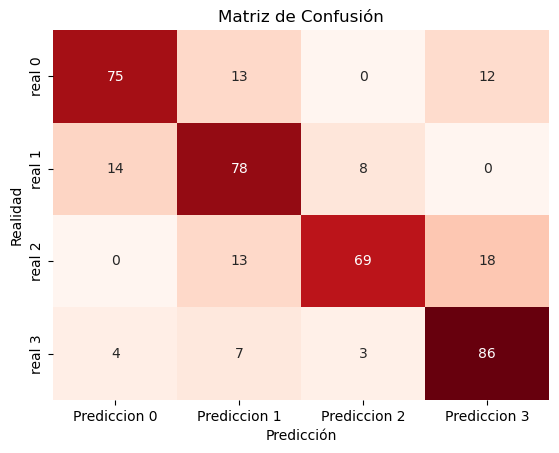

In [ ]:
# 3 Calcular la matriz de confusion

conf_matrix = confusion_matrix(y_test, pred_test)

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1', 'Prediccion 2', 'Prediccion 3'],
            yticklabels=['real 0', 'real 1', 'real 2', 'real 3'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()

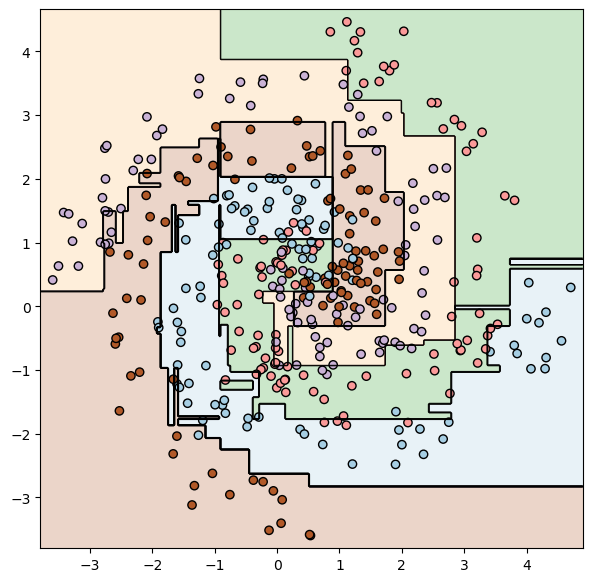

In [ ]:
plot_decision_boundary(modelo_arbol, X_test, y_test)

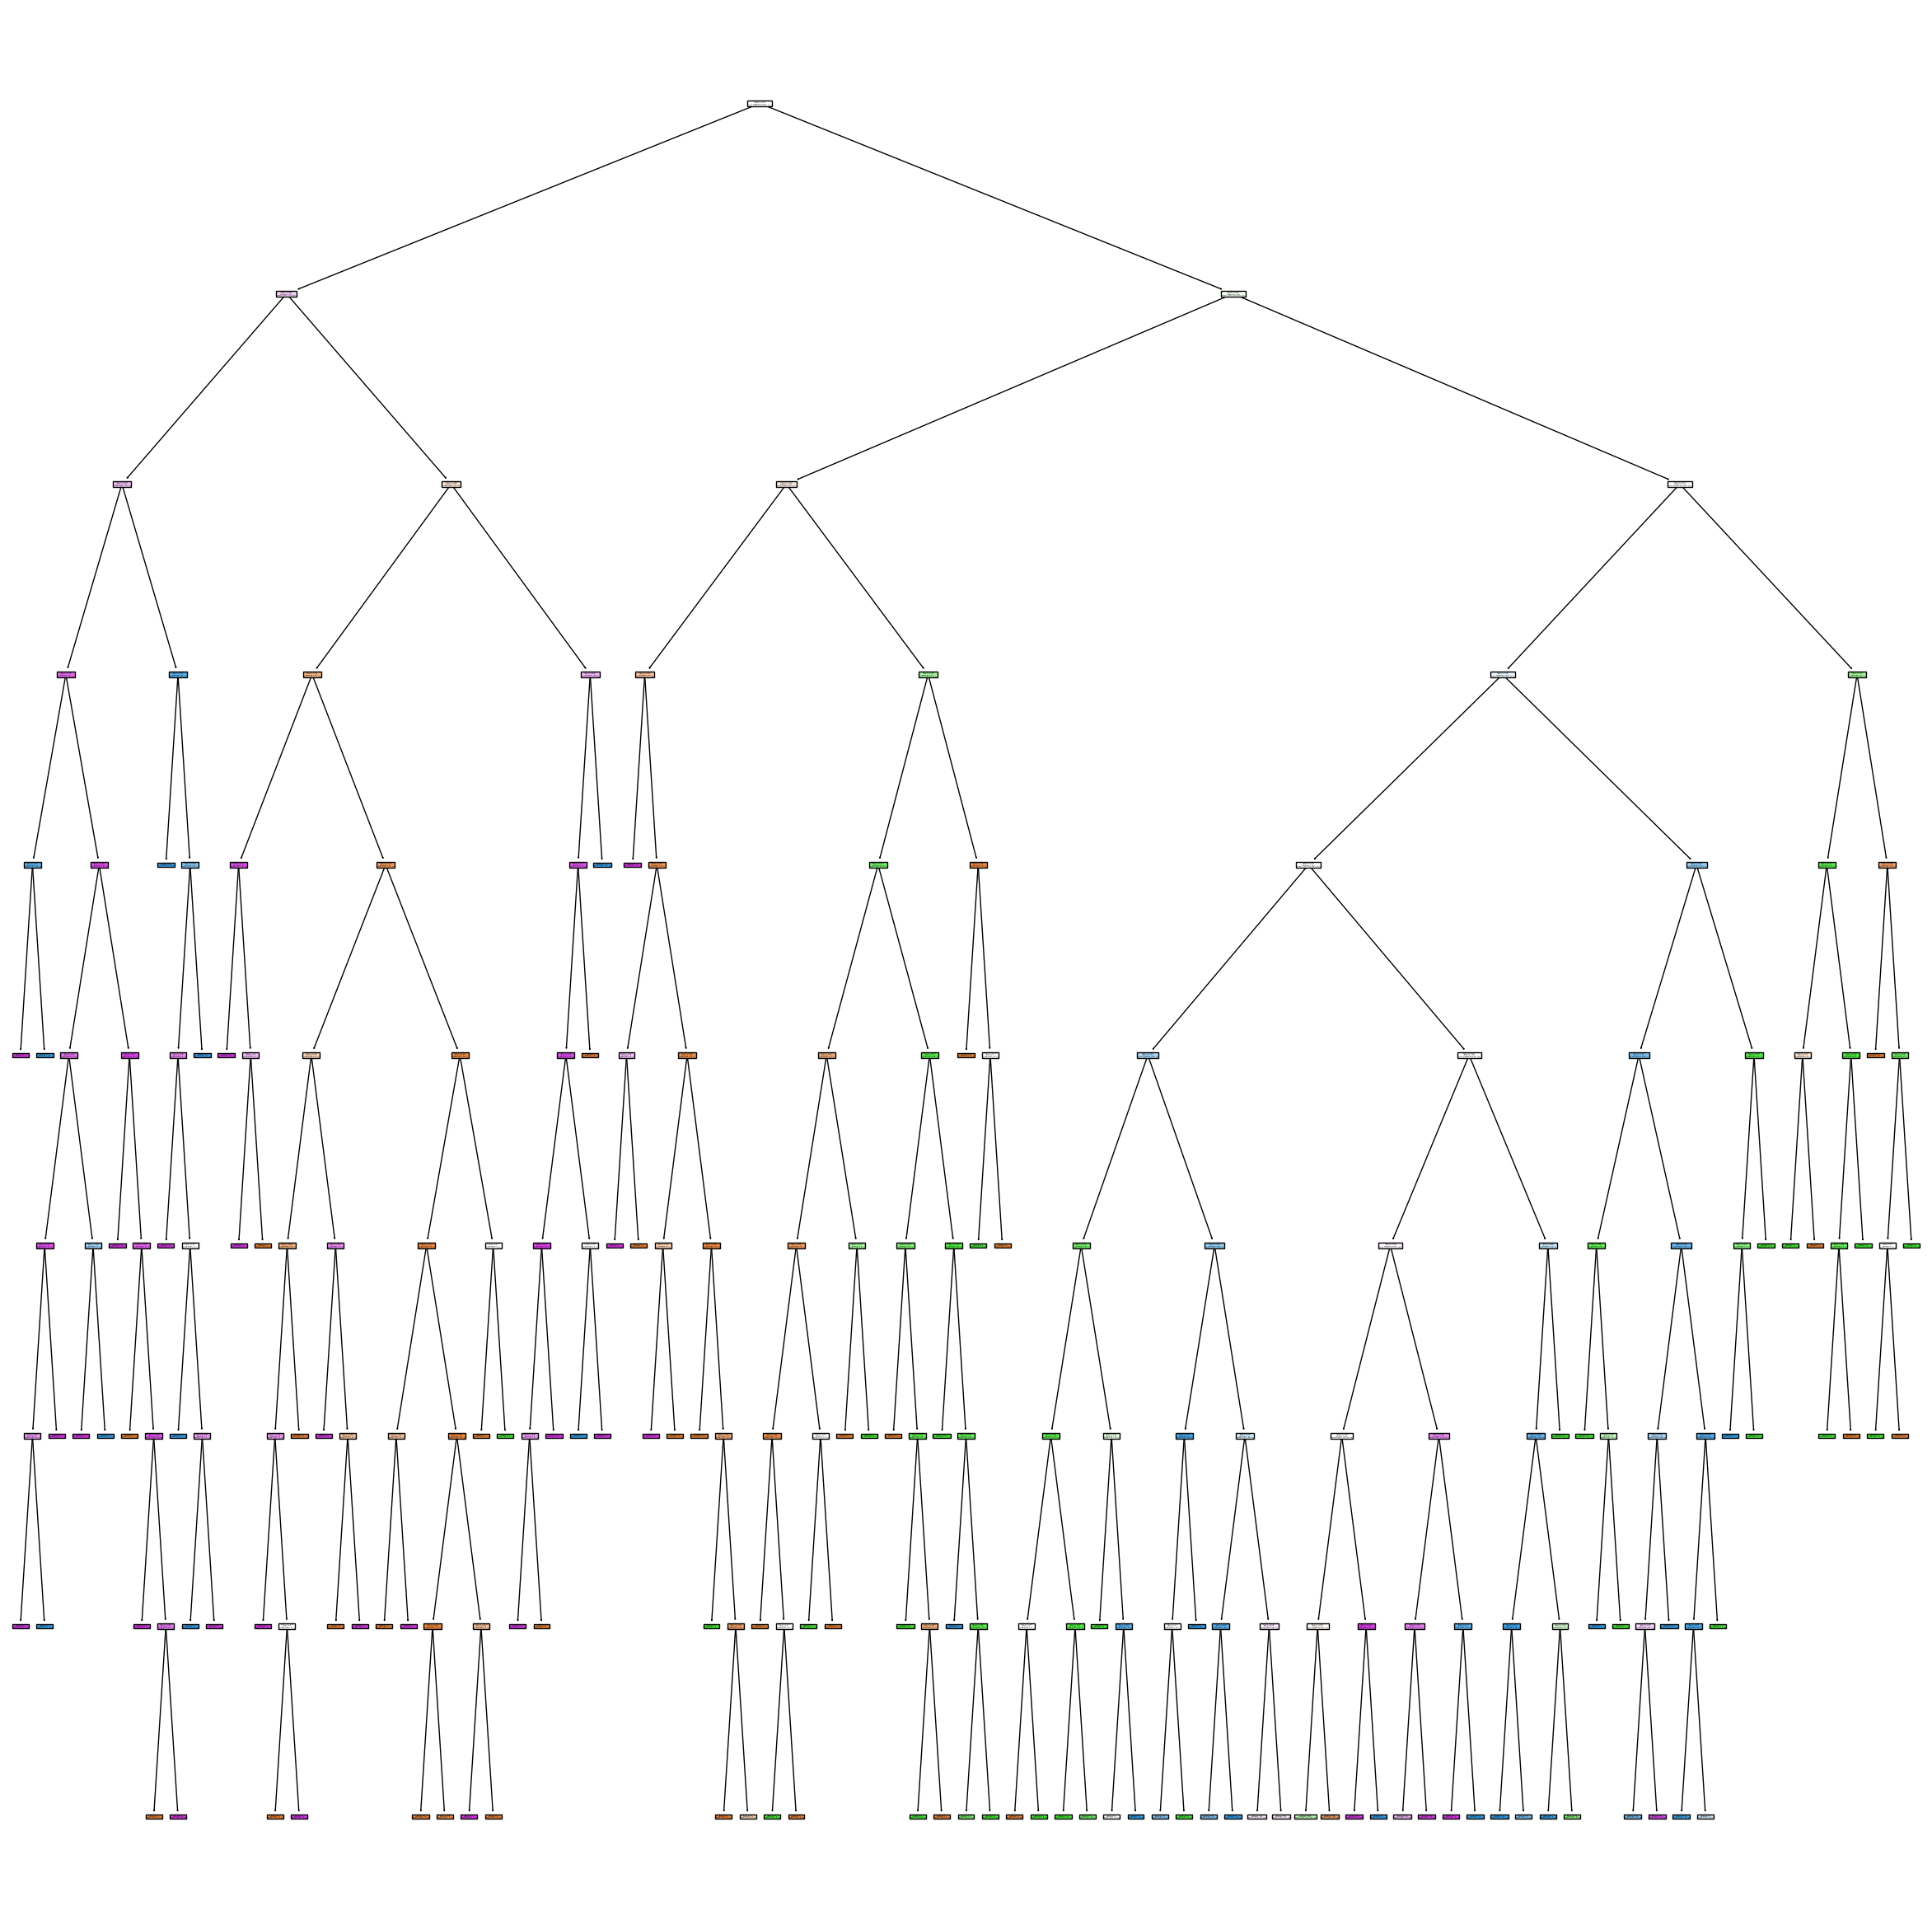

In [ ]:
plt.figure(figsize=(30,30))
tree.plot_tree(modelo_arbol,filled=True)
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa y comenta los resultados obtenidos en la búsqueda de los mejores hiperparámetros. Considera cómo la combinación óptima de `max_depth` y `min_samples_split` ha impactado el rendimiento del árbol de decisión.
2. Examina las fronteras de decisión generadas con el conjunto de _test_. Reflexiona sobre si la forma de estas fronteras es coherente con lo que esperarías de un árbol de decisión configurado con estos hiperparámetros.
3. Analiza las predicciones realizadas sobre el conjunto de test. Observa su precisión y cómo se distribuyen en relación con las fronteras de decisión. ¿Son consistentes estas predicciones con la estructura del árbol de decisión y las fronteras observadas?

Este análisis te ayudará a comprender la eficacia del árbol de decisión con los hiperparámetros seleccionados y su impacto en la clasificación de los datos."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

Finalmente, encontramos los mejores hiperparametros con max_depth = 9 y min_test_split = 2. Estos hiperparametros han reestrucutrado el ploteo de nuestro conjunto de datos aunque en la teoria siguen siendo lineas rectas debido a la estructura interna de los arboles de decisión.
    
En este caso, el modelo consigue un accuracy del 84 % en el entrenamiento por lo que se ha conseguido solventar el sobreentrenamiento. En el conjunto de test se ha llegado al 77%.  
    


</div>

<a id='ej2'></a>
# 2. Implementación del caso práctico (5 puntos)

Como experto en análisis de datos, sabemos la importancia de que las empresas de tarjetas de crédito puedan identificar y prevenir transacciones fraudulentas para proteger a sus clientes. En este sentido, estudiaremos un conjunto de datos que contiene información sobre transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

Este conjunto de datos presenta transacciones ocurridas en dos días, donde se registraron 492 casos de fraude de un total de 284,807 transacciones. Es importante destacar que todas las variables de entrada son numéricas y fueron obtenidas a través de una transformación PCA. Lamentablemente, debido a razones de confidencialidad, no se pueden proporcionar las características originales ni más información sobre los datos. Las variables V1 a V28 representan los componentes principales obtenidos con PCA, mientras que "Time" e "Amount" son las únicas variables que no han sido transformadas con PCA. La variable "Time" indica los segundos transcurridos entre cada transacción y la primera transacción del conjunto de datos, mientras que "Amount" representa el monto de la transacción. La variable "Class" es la variable de respuesta y toma el valor 1 en caso de fraude y 0 en caso contrario.

Fuente: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

El objetivo de esta sección es abordar el análisis de este conjunto de datos de varias maneras para identificar y prevenir transacciones fraudulentas. Aquí tienes algunos pasos que podrías seguir:

1. **Análisis Exploratorio de Datos (EDA)**: Comienza explorando el conjunto de datos para comprender su estructura y distribución. Dado que las transacciones fraudulentas son mucho menos frecuentes que las transacciones normales, este es un ejemplo de conjunto de datos desbalanceado. Observa la distribución de las variables "Time" y "Amount" y cómo se relacionan con la variable objetivo "Class".

2. **Preprocesamiento de Datos**: Como las variables han sido transformadas usando PCA, es probable que no requieras de mucha transformación adicional. Sin embargo, considera normalizar las variables "Time" y "Amount" para que estén en la misma escala que las componentes principales.

3. **Modelización**: Utiliza un perceptrón multicapa como herramienta de clasificación. Dado que el objetivo es identificar transacciones fraudulentas, es vital centrarse en métricas como la precisión, la sensibilidad (recall), el valor F1 y el área bajo la curva ROC (AUC-ROC).

4. **Ajuste de Hiperparámetros**: Utiliza la validación cruzada para evaluar de una manera más fiable el rendimiento de tu modelos. Además, ajusta los hiperparámetros para mejorar la precisión de tus modelos.

Este enfoque integral te permitirá no solo construir un modelo efectivo para detectar fraudes sino también comprender mejor las características subyacentes de las transacciones fraudulentas en el conjunto de datos.

## 2.0. Carga de datos

Lo primero que debes hacer es cargar el conjunto de datos y visualizar las primeras filas para obtener una vista previa. Asegúrate de verificar lo siguiente:

1. Confirma la cantidad total de filas y columnas en el DataFrame.
2. Revisa el nombre de cada columna del DataFrame.
3. Verifica el número de valores no nulos en cada columna.
4. Identifica el tipo de datos de cada columna, que puede ser int, float, object, entre otros.
5. Comprueba la cantidad de memoria utilizada por el DataFrame.

Estos pasos te proporcionarán una comprensión inicial clara y detallada del conjunto de datos con el que estás trabajando."

In [42]:
data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### 2.1. Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA, por sus siglas en inglés) en ciencia de datos es un enfoque inicial para comprender y resumir el contenido de un conjunto de datos. Este proceso implica varias técnicas y pasos:

1. **Inspección de Datos**: Se comienza por revisar los datos brutos para identificar su estructura, tamaño y tipo (como numérico, categórico). Esto incluye detectar valores faltantes o inusuales.

2. **Resumen Estadístico**: Se calculan estadísticas descriptivas como la media, mediana, rango, varianza y desviación estándar para obtener una idea general de las tendencias y patrones en los datos.

3. **Visualización de Datos**: Se utilizan gráficos y diagramas (como histogramas, gráficos de caja, diagramas de dispersión) para visualizar distribuciones, relaciones entre variables y posibles anomalías. Esto ayuda a comprender mejor los datos y a identificar patrones o irregularidades.

4. **Análisis de Relaciones y Correlaciones**: Se exploran las relaciones entre diferentes variables para entender cómo se influencian entre sí. Esto puede implicar el uso de matrices de correlación y gráficos de dispersión.

5. **Identificación de Patrones y Anomalías**: Se buscan patrones consistentes o anomalías (como valores atípicos) que puedan sugerir tendencias o problemas en los datos.

El EDA es una fase crítica en cualquier proyecto de ciencia de datos, ya que proporciona una comprensión profunda y una base sólida para posteriores análisis y modelado.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Calcula las frecuencias de la variable objetivo (`Class`) en tu conjunto de datos. Esta variable indica si una transacción es fraudulenta o no.
2. Crea un gráfico de barras para visualizar estas frecuencias. Esto te ayudará a entender la proporción de transacciones fraudulentas en comparación con las legítimas.

A continuación, analiza la distribución de las variables descriptoras:

1. Representa gráficamente el histograma de las 30 variables, separando las observaciones según la clase a la que pertenecen (fraude o no fraude).
2. Organiza todos los histogramas en un formato de 10 filas y 3 columnas. Esto facilitará la comparación visual de las distribuciones para cada clase en cada variable.

Estos pasos te permitirán obtener una visión más clara de la estructura de tu conjunto de datos y cómo las diferentes variables pueden influir en la identificación de transacciones fraudulentas."
    </div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [44]:
# 1. Calcula las frecuencias de la variable objetivo (`Class`) en tu conjunto de datos.

counts = data['Class'].value_counts()
print(counts)

0    284315
1       492
Name: Class, dtype: int64


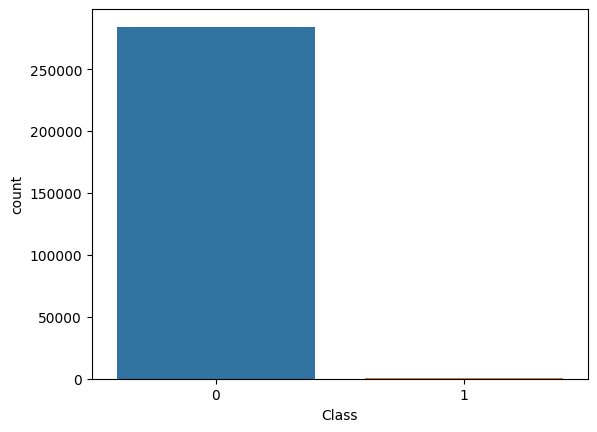

In [45]:
# 2. Crea un gráfico de barras para visualizar estas frecuencias.

sns.countplot(x='Class', data=data)
plt.show()

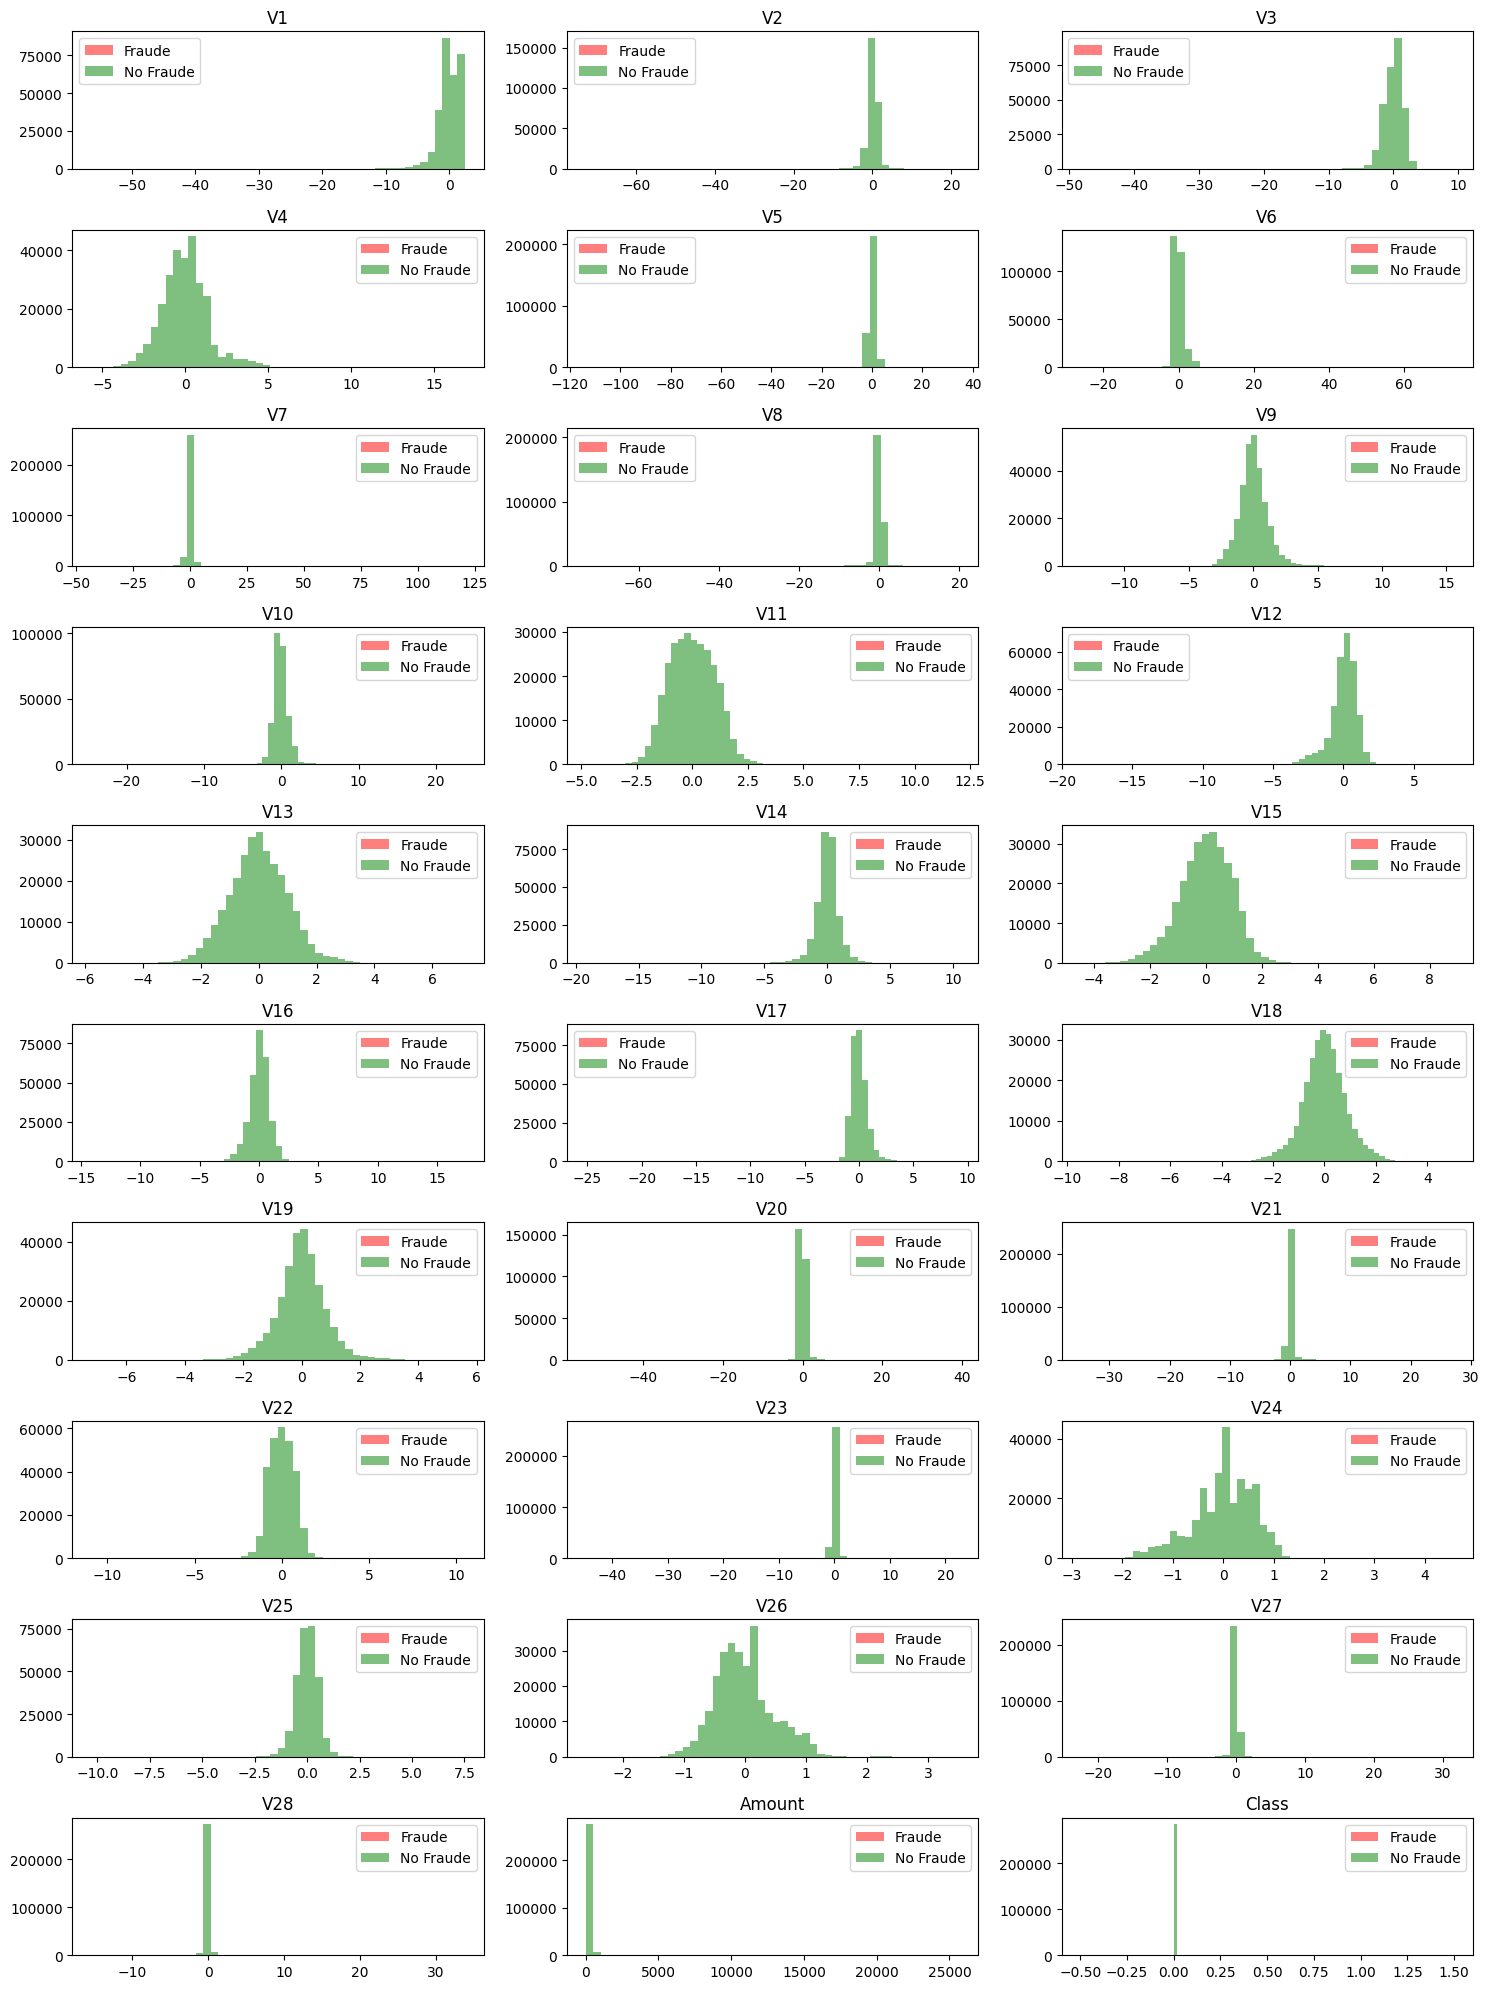

In [46]:
fraud_data = data[data['Class'] == 1]
non_fraud_data = data[data['Class'] == 0]

# Seleccionar las primeras 30 variables para el histograma
variables = data.columns[1:31]

# Organizar los histogramas en un formato de 10 filas y 3 columnas
fig, axes = plt.subplots(nrows=10, ncols=3, figsize=(15, 20))

# Iterar sobre las variables y crear histogramas en cada subplot
for i, variable in enumerate(variables):
    row = i // 3
    col = i % 3

    axes[row, col].hist(fraud_data[variable], bins=50, alpha=0.5, label='Fraude', color='red')
    axes[row, col].hist(non_fraud_data[variable], bins=50, alpha=0.5, label='No Fraude', color='green')
    axes[row, col].set_title(variable)
    axes[row, col].legend()

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

1. Evalúa la relación de las frecuencias de la variable `Class`. Reflexiona sobre cómo se distribuyen las transacciones entre fraudulentas y no fraudulentas. ¿Es la distribución significativamente desigual? ¿Qué implica esto para el análisis y la modelización de los datos?
2. Analiza la información proporcionada por los histogramas de las variables descriptoras. Observa si hay diferencias notables en las distribuciones de estas variables entre las clases. Pregúntate: ¿Hay variables que muestren patrones distintos para las transacciones fraudulentas en comparación con las legítimas?
3. Considera si hay otras formas de visualización que podrían ser útiles para entender mejor los datos. Por ejemplo, ¿serían útiles los diagramas de caja (boxplots) para visualizar la distribución de las variables en ambas clases? ¿Podría un mapa de calor de la matriz de correlación entre variables ayudarte a entender las relaciones entre ellas?

Este análisis te ayudará a obtener una comprensión más profunda de la naturaleza de tus datos y a identificar posibles características que podrían ser importantes para detectar transacciones fraudulentas."
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. Nos encontramos con un problema de conjunto de datos desequilibrado ya que las clases fraudulentas no superan el 2 % del conjunto de los datos. Esto implica para el analisis que encontraremos dificultades para identificar patrones que señalen a la clase minoritaria.
    
2. Con la informacion de los histogramas solo podremos sacar informacion de las clases de no fraudulentas que son las mayoritarias. Esto se debe a que al ser el 98% de los datos se hacen visibles para el analista solo las mayoritarias.
    
    
3. En efecto existen mejores formas para poder visualizar los datos podriamos utiilizar el diagrama de caja o el de violin ya que separa visualmente las dos clases y se podrian sacar conclusiones a priori mas facilmente. El mapa de calor de las correlaciones tambien podria extraer informacion valiosa ya que podriamos ver que variables descriptivas son las mas explicativas de cada una de las clases.
    

</div>

### 2.2. Preprocesamiento de Datos

El preprocesamiento de datos en ciencia de datos es un paso crucial que involucra la preparación y transformación de datos brutos en un formato adecuado para su posterior análisis y modelado. Este proceso incluye varias tareas esenciales:

1. **Limpieza de Datos**: Se eliminan o corrigen datos erróneos, incompletos, inexactos o irrelevantes. Esto puede incluir tratar con valores faltantes, corregir errores de entrada y manejar outliers.

2. **Normalización y Escalado**: Los datos se transforman para que estén en una escala común, sin distorsionar diferencias en los rangos de valores ni perder información. Por ejemplo, escalado min-max o estandarización.

3. **Codificación de Variables Categóricas**: Las variables categóricas (como género o país) se convierten en formatos numéricos para que puedan ser procesadas por algoritmos de aprendizaje automático, utilizando técnicas como codificación one-hot o codificación de etiquetas.

4. **División de Datos**: Los datos se dividen en conjuntos de entrenamiento, validación y prueba, permitiendo entrenar modelos, afinar hiperparámetros y evaluar el rendimiento del modelo de manera efectiva.

5. **Manejo de Datos Desbalanceados**: En casos de conjuntos de datos desbalanceados, se aplican técnicas como sobremuestreo o submuestreo para asegurar que el modelo no esté sesgado hacia la clase más frecuente.

6. **Ingeniería de Características**: Se crean nuevas variables (características) a partir de los datos existentes para mejorar la capacidad del modelo para aprender patrones y hacer predicciones.

El preprocesamiento es esencial para mejorar la calidad de los datos y hacerlos más adecuados y efectivos para análisis y modelado en proyectos de ciencia de datos.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Dado que las columnas `Time` y `Amount` presentan problemas para su uso directo en el análisis, primero elimina la columna `Time` del conjunto de datos. No está claro qué significa esta columna, por lo que su eliminación simplificará tu análisis.
2. A continuación, transforma la columna `Amount` para reducir su rango. Antes de tomar el logaritmo de `Amount`, suma 0.001 (un céntimo de dólar) a cada valor en esta columna para evitar la indeterminación cuando el valor es 0.
3. Después de realizar esta suma, calcula el logaritmo de `Amount` transformado.
4. Finalmente, reemplaza la columna original `Amount` en tu DataFrame por esta nueva columna de `Log Amount`.

Estos ajustes te ayudarán a normalizar la escala de los datos y a mejorar la eficacia de tus modelos de análisis."

</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [47]:
df_new = data.copy()
df_new.pop('Time')

df_new['Amount'] = df_new['Amount'] + 0.001

df_new['Amount'] = df_new['Amount'] + 0.001

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Aquí tienes el texto reescrito en segunda persona del singular y en imperativo:

Para la implementación, sigue estos pasos:

1. Primero, separa los descriptores de la variable respuesta. Asigna los descriptores al conjunto `X` y la variable respuesta al conjunto `y`.
2. Divide el _dataset_ en dos subconjuntos: uno para entrenamiento (_train_) y otro para pruebas (_test_). Asigna el 80% de los datos al conjunto de entrenamiento (`X_train`, `y_train`) y el 20% al conjunto de pruebas (`X_test`, `y_test`). Utiliza la función `train_test_split` de la biblioteca `model_selection` de `sklearn`. Asegúrate de usar `random_state = 24` y haz una división estratificada para mantener la misma proporción de clases en ambos conjuntos.
3. Es importante que las matrices de las clases `y_train` e `y_test` estén codificadas. Para esto, utiliza la función `to_categorical` de la librería `TensorFlow` de `Keras`. Esto convertirá las etiquetas de clase en matrices de etiquetas de clase codificadas en one-hot.

Recuerda, la codificación one-hot convierte las etiquetas categóricas en vectores binarios. En estos vectores, el valor de 1 se asigna a la posición correspondiente a la clase y el valor de 0 a todas las demás posiciones. Esto facilita que los modelos de aprendizaje automático procesen y entiendan las etiquetas categóricas.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [48]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X = df_new.iloc[:, (df_new.columns != 'Class')]
y = df_new.iloc[:, df_new.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.2, stratify=y, random_state=24)

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Normaliza los descriptores utilizando el `StandardScaler` de `sklearn`. Esto estandarizará las características restando la media y dividiendo por la desviación estándar.
2. Muestra las dimensiones del conjunto de descriptores original, del conjunto de entrenamiento y del conjunto de prueba. Esto te permitirá ver cómo se han dividido los datos.

<strong>Nota:</strong> Ajusta el `StandardScaler` únicamente con los descriptores de entrenamiento para evitar la fuga de información o 'data leakage'. La fuga de información ocurre cuando se utiliza información del conjunto de prueba o validación en el proceso de ajuste del modelo. Es decir, si ajustas el modelo de escalado con todo el conjunto de datos, estarías utilizando información del conjunto de prueba o validación en el ajuste, lo que podría dar la impresión de que el modelo es más preciso de lo que realmente es. Por lo tanto, asegúrate de ajustar el `StandardScaler` solo con los datos de entrenamiento y luego aplicarlo a los conjuntos de entrenamiento y prueba."
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print('Dimensiones del conjunto de descriptores originales:', X.shape)
print('Dimensiones del conjunto de descriptores de entrenamiento:', X_train.shape)
print('Dimensiones del conjunto de descriptores de prueba:', X_test.shape)

Dimensiones del conjunto de descriptores originales: (284807, 29)
Dimensiones del conjunto de descriptores de entrenamiento: (227845, 29)
Dimensiones del conjunto de descriptores de prueba: (56962, 29)


## 2.3. Modelización

El MLP (Perceptrón Multicapa) es, sin duda, una poderosa herramienta en el campo del aprendizaje automático y la inteligencia artificial. Puede manejar tareas de clasificación y regresión, lo que lo hace versátil para una variedad de problemas. Su capacidad para modelar relaciones no lineales complejas lo convierte en una elección popular cuando los datos no siguen patrones lineales simples.

Aquí hay algunos puntos clave sobre el MLP:

- **Capas y Neuronas**: El MLP consta de múltiples capas de neuronas, que incluyen una capa de entrada, una o más capas ocultas y una capa de salida. Cada neurona en una capa está conectada a todas las neuronas en la capa siguiente.

- **Funciones de Activación**: Para introducir no linealidad en el modelo, se utilizan funciones de activación en las neuronas, como la función sigmoide, ReLU (Rectified Linear Unit) o tangente hiperbólica. Estas funciones permiten al MLP capturar patrones complejos en los datos.

- **Aprendizaje Supervisado**: El entrenamiento del MLP implica ajustar los pesos de las conexiones entre neuronas para minimizar la diferencia entre las salidas producidas por la red y las salidas deseadas. Esto se hace utilizando algoritmos de aprendizaje supervisado, como el descenso del gradiente.

- **Ajuste de Hiperparámetros**: Al igual que otros modelos de aprendizaje automático, el MLP tiene hiperparámetros importantes, como el número de capas ocultas, el número de neuronas en cada capa, la función de activación y la tasa de aprendizaje. A menudo, es necesario ajustar estos hiperparámetros para obtener un buen rendimiento en una tarea específica.

- **Generalización**: Uno de los desafíos en el entrenamiento de MLP es evitar el sobreajuste (overfitting), donde el modelo se adapta demasiado a los datos de entrenamiento y no generaliza bien a datos nuevos. La regularización y la validación cruzada son técnicas comunes para abordar este problema.

En este contexto de detección de fraude en transacciones de tarjetas de crédito, el MLP puede ser una excelente opción para modelar patrones complejos que indiquen transacciones fraudulentas. Sin embargo, es importante ajustar y evaluar cuidadosamente el modelo para garantizar que funcione de manera efectiva en esta tarea crítica de seguridad.

Crear y entrenar un MLP con 4 capas ocultas, cada una con 20 neuronas y función de activación ReLU es una excelente elección. La función de activación ReLU (Rectified Linear Unit) es comúnmente utilizada en capas ocultas de redes neuronales debido a su capacidad para introducir no linealidad en el modelo, lo que le permite aprender patrones complejos en los datos.

Por otra parte, el enfoque de apilar capas secuencialmente utilizando la clase `Sequential` de Keras es una forma eficaz y sencilla de construir modelos de redes neuronales. Luego, durante el entrenamiento, se pueden realizar ajustes en los hiperparámetros y la arquitectura del modelo para optimizar su rendimiento en la tarea específica.

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

1. Comienza creando el modelo `Sequential`.
2. Agrega 4 capas ocultas, cada una con 20 neuronas, utilizando el método `.add()`. Asegúrate de que cada capa tenga una función de activación `relu`.
3. Después, agrega la capa de salida con 2 neuronas (una para la clase 0 y otra para la clase 1) y utiliza la función de activación `sigmoid`.
4. No olvides mostrar un resumen del modelo que has creado utilizando el método `.summary()`.
5. Ahora, es hora de compilar el modelo. Utiliza el método `.compile()` y especifica el optimizador como `adam`, la función de pérdida como `binary_crossentropy`, y la métrica de evaluación como `accuracy`.
6. Luego, procede a entrenar el modelo utilizando el método `.fit()`. Asegúrate de entrenar con los datos de `X_train`, establece el número de épocas en 100 y el tamaño del lote en 2048. Además, valida el rendimiento utilizando la técnica de validación cruzada con el 80% de los datos de entrenamiento. Configura el parámetro `validation_split` en 0.2 para lograr esto.
7. Para el informe final, crea gráficos que muestren la pérdida (`loss`) tanto en el entrenamiento como en la validación a lo largo de las épocas.
8. También, genera gráficos que representen la exactitud (`accuracy`) en el entrenamiento y la validación a lo largo de las épocas.
9. Recuerda configurar `verbose=0` al entrenar para evitar mostrar información durante el proceso.
    
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [33]:
from keras.models import Sequential
from keras.layers import Dense

EPOCHS = 100
BATCH_SIZE = 2048

# Definir el modelo
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                600       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 2)                 42        
                                                                 
Total params: 1902 (7.43 KB)
Trainable params: 1902 (7.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


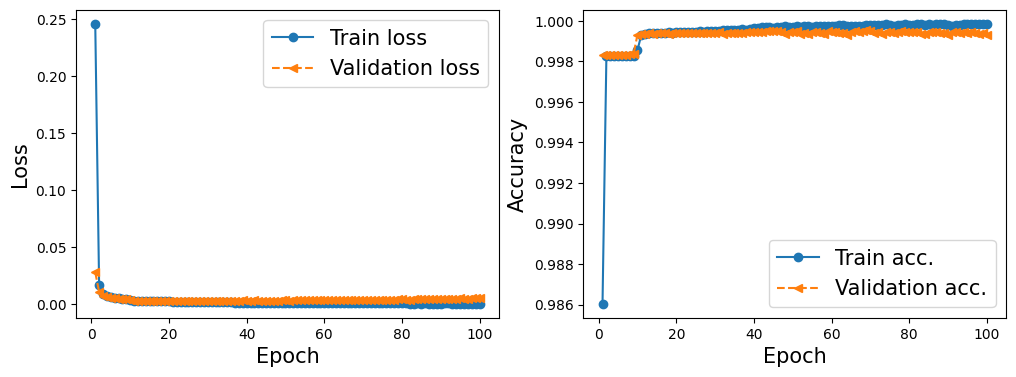

In [34]:
import matplotlib.pyplot as plt
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
#plt.savefig('figures/15_12.png', dpi=300)
plt.show()

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

Luego de haber entrenado y validado el modelo, es hora de realizar la prueba final. Sigue los siguientes pasos:

1. Utiliza el modelo para predecir la clase de `X_test`.
2. Calcula la matriz de confusión para evaluar el rendimiento de las predicciones.
3. Calcula la precisión (accuracy) para medir la exactitud de las predicciones.
4. Calcula la sensibilidad (recall) para evaluar la capacidad del modelo para identificar positivos reales.
5. Calcula el valor F1, que es una medida que combina precisión y sensibilidad.
6. Finalmente, calcula el área bajo la curva ROC (AUC-ROC) para evaluar el rendimiento del modelo en la clasificación binaria.

<strong>Nota:</strong> Repite varias veces todo el proceso y verifica la variablidad d elos resultados.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

1781/1781 [==============================] - 7s 4ms/step


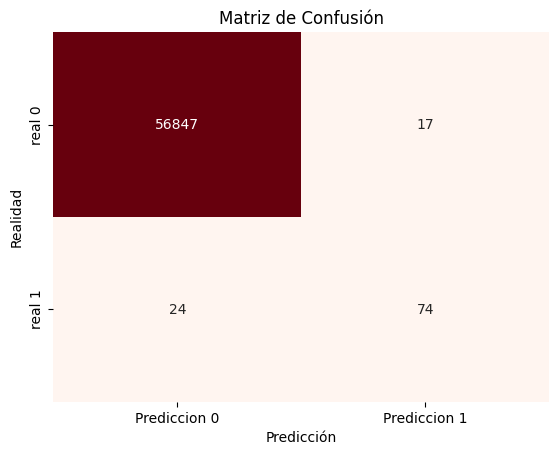


Accuracy: 0.9992802219023208
Recall: 0.7551020408163265
F1 Score: 0.783068783068783
AUC-ROC Score: 0.8774015409483996


In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
y_pred = model.predict(X_test)


# Calcular la matriz de confusión
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1'],
            yticklabels=['real 0', 'real 1'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


# Calcular métricas de evaluación
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Imprimir los resultados

print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>
    
1. Realiza un análisis de los resultados y decide si consideras que este modelo es aceptable.
2. Evalúa cuál de las medidas de rendimiento utilizadas es la más apropiada.
3. Examina la distribución de las clases y plantea una estrategia, si es necesario, para asegurar la confiabilidad del estudio realizado.
</div>

<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

1. Este modelo no es acceptable debido a que la F1 score indica que tiene una precision y sensibilidad del 77% por lo que es posible buscar modelos alternativos. Ademas, el accuracy no es importante debido a que como la clase mayoritaria son las no frauduletas esta acertando la mayoria de ellas.
    
2. Las medidas de rendimiento para nuestro caso serian la F1 score o la curva de ROC debido a que muestran el nivel de nuestro algoritmo para identificar los dos tipos de clase

3. Como nos encontramos con un conjunto de datos desbalanceado podriamos probar la tecnica de sobremuestro. En nuestro caso utilizaremos el algoritmo SMOTE ya que cre muestras sinteticas tomando en consideracion los vecinos cercanos pero no las duplica por lo que crearemos datos nuevos y seran mas validos a la hora de testearlo

</div>

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>

- Repite el procedimiento anterior considerando la estrategia que consideres necesaria para mejorar la confiabilidad del modelo. Utiliza la misma configuración de la red neuronal utilizada.
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [38]:

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X,y)

print('Original dataset shape:', len(X))
print('Resampled dataset shape:', len(X_resampled))

counts = y_resampled['Class'].value_counts()
print(counts)

X_train, X_test, y_train, y_test = train_test_split(X_resampled, to_categorical(y_resampled), test_size=0.2, random_state=24)

Original dataset shape: 284807
Resampled dataset shape: 568630
0    284315
1    284315
Name: Class, dtype: int64


In [40]:
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo
model = Sequential()
model.add(Dense(20, input_dim=X.shape[1], activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2, verbose=0)

#test using test set
_,acc = model.evaluate(X_test, y_test, verbose=0)

3554/3554 [==============================] - 7s 2ms/step

Accuracy: 0.9989800045723933
Recall: 0.9992076627812797
F1 Score: 0.9989789990670165
AUC-ROC Score: 0.9989802804878084


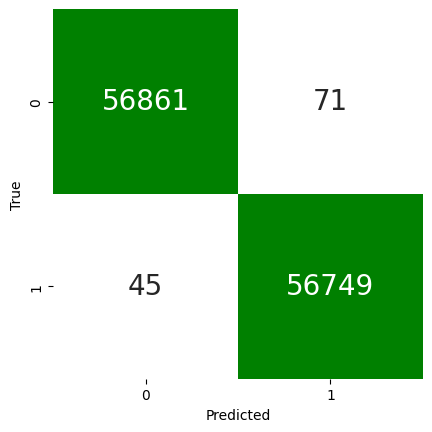

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1'],
            yticklabels=['real 0', 'real 1'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()



# Calcular métricas de evaluación
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Imprimir los resultados

print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)

<div class="alert alert-block alert-info">
<strong>Análisis:</strong>

- ¿Cuál es tu evaluación de los resultados obtenidos? ¿Consideras que este modelo es superior al anterior? ¿Podría considerarse como un modelo aceptable?
- Centrándonos en las variables predictoras, ¿qué estrategias crees que podrían aplicarse para mejorar la capacidad predictiva del modelo?
</div>

texto en negrita<div class="alert alert-block alert-success">
<strong>Respuesta:</strong>

En este caso, al aplicar la tecnica de SMOTE hemos mejorado el modelo considerablemente con una sensibilidad de 99% por lo que se puede decir que hemos encontrado el mejor modelo de clasificacion para nuestro juego de datos.

</div>

## 2.4. Ajuste de Hiperparámetros.

El ajuste de hiperparámetros es un proceso crucial en el entrenamiento de modelos de redes neuronales. Los hiperparámetros son configuraciones que no se aprenden automáticamente durante el entrenamiento, a diferencia de los pesos de las neuronas. En su lugar, debes ajustarlos manualmente para obtener un modelo óptimo.

Para realizar el ajuste de hiperparámetros en una red neuronal, sigue estos pasos:

1. Selecciona los hiperparámetros clave que deseas ajustar, como la tasa de aprendizaje, el número de capas ocultas, el número de neuronas en cada capa, la función de activación, etc.

2. Divide tus datos en conjuntos de entrenamiento, validación y prueba. El conjunto de validación se utiliza para evaluar el rendimiento de diferentes configuraciones de hiperparámetros.

3. Entrena tu modelo de red neuronal utilizando diferentes combinaciones de hiperparámetros en el conjunto de entrenamiento.

4. Evalúa el rendimiento del modelo en el conjunto de validación para cada conjunto de hiperparámetros.

5. Ajusta los hiperparámetros en función de los resultados en el conjunto de validación. Puedes utilizar técnicas como la búsqueda en cuadrícula o la optimización bayesiana para encontrar la mejor combinación de hiperparámetros.

6. Una vez que hayas encontrado los mejores hiperparámetros en el conjunto de validación, evalúa el rendimiento final del modelo en el conjunto de prueba para asegurarte de que generalice bien a datos no vistos.

Recuerda que el ajuste de hiperparámetros es un proceso iterativo y puede llevar tiempo, pero es esencial para obtener un modelo de redes neuronales con un buen rendimiento en tareas de data science. ¡Manos a la obra!

<div class="alert alert-block alert-info">
<strong>Implementación:</strong>
    
- Para automatizar el proceso de búsqueda de parámetros, utiliza la función `GridSearchCV` de `sklearn.model_selection` y la función `KerasClassifier` de `scikeras.wrappers`
</div>

<div class="alert alert-block alert-danger">
<strong>Solución:</strong>
</div>

In [ ]:

from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense

# Función para crear el modelo, asegurándose de que los nombres de los parámetros coincidan
def create_model(neurons=64, optimizer='adam', layers=1):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))
    for _ in range(layers - 1):  # Añade las capas ocultas según el parámetro 'layers'
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Solo se necesita una salida para la clasificación binaria
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model



# Crear un objeto KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=50)

# Definir los hiperparámetros a ajustar
params = {
    'model__neurons': [20, 30, 40, 50],
    'model__optimizer': ['adam','sgd','rmsprop'],
    'model__layers': [1, 2, 3, 4]
}

y_train_indices = np.argmax(y_train, axis=1)
# Realizar la búsqueda de los mejores hiperparámetros
grid = GridSearchCV(estimator=model, param_grid=params, cv=3)
grid_result = grid.fit(X_train, y_train_indices)

# Mostrar los resultados
print("Mejor resultado de la validación cruzada: %f usando %s" % (grid_result.best_score_, grid_result.best_params_))


Epoch 1/10
3038/3038 [==============================] - 14s 2ms/step - loss: 0.0291 - accuracy: 0.9950
Epoch 2/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0039 - accuracy: 0.9993
Epoch 3/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 4/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0032 - accuracy: 0.9993
Epoch 5/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 6/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0028 - accuracy: 0.9993
Epoch 7/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 8/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 9/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0024 - accuracy: 0.9994
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step
Epoch 1/10
3

3038/3038 [==============================] - 6s 2ms/step - loss: 0.0050 - accuracy: 0.9994
Epoch 3/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 4/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0050 - accuracy: 0.9994
Epoch 5/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 6/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 7/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 8/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 9/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0049 - accuracy: 0.9994
Epoch 10/10
1519/1519 [==============================] - 2s 1ms/step
Epoch 1/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0152 - accuracy: 0.9987
Epoch 2/10
3038/3038 [==

3038/3038 [==============================] - 11s 4ms/step - loss: 0.0063 - accuracy: 0.9991
Epoch 4/10
3038/3038 [==============================] - 11s 4ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 5/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0048 - accuracy: 0.9992
Epoch 6/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0044 - accuracy: 0.9993
Epoch 7/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0042 - accuracy: 0.9993
Epoch 8/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 9/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 10/10
1519/1519 [==============================] - 5s 4ms/step
Epoch 1/10
3038/3038 [==============================] - 12s 4ms/step - loss: 0.0389 - accuracy: 0.9964
Epoch 2/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0081 - accuracy: 0.9991
Epoch 3/10
3038/30

3038/3038 [==============================] - 6s 2ms/step - loss: 0.0028 - accuracy: 0.9994
Epoch 4/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Epoch 5/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 6/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0023 - accuracy: 0.9995
Epoch 7/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 8/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 9/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 10/10
1519/1519 [==============================] - 2s 1ms/step
Epoch 1/10
3038/3038 [==============================] - 8s 2ms/step - loss: 0.0106 - accuracy: 0.9990
Epoch 2/10
3038/3038 [==============================] - 6s 2ms/step - loss: 0.0029 - accuracy: 0.9994
Epoch 3/10
3038/3038 [==

3038/3038 [==============================] - 7s 2ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 5/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 6/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 7/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 8/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 9/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0036 - accuracy: 0.9994
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step
Epoch 1/10
3038/3038 [==============================] - 8s 2ms/step - loss: 0.0099 - accuracy: 0.9992
Epoch 2/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0042 - accuracy: 0.9995
Epoch 3/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0041 - accuracy: 0.9995
Epoch 4/10
3038/3038 [=

3038/3038 [==============================] - 13s 4ms/step - loss: 0.0047 - accuracy: 0.9993
Epoch 5/10
3038/3038 [==============================] - 12s 4ms/step - loss: 0.0043 - accuracy: 0.9993
Epoch 6/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 7/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0038 - accuracy: 0.9993
Epoch 8/10
3038/3038 [==============================] - 11s 4ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 9/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step
Epoch 1/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0382 - accuracy: 0.9931
Epoch 2/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0062 - accuracy: 0.9989
Epoch 3/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0045 - accuracy: 0.9993
Epoch 4/10
3038/303

3038/3038 [==============================] - 10s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 5/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 6/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 7/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 8/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/10
3038/3038 [==============================] - 8s 2ms/step - loss: 0.0016 - accuracy: 0.9995
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step
Epoch 1/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0078 - accuracy: 0.9992
Epoch 2/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 3/10
3038/3038 [==============================] - 9s 3ms/step - loss: 0.0024 - accuracy: 0.9995
Epoch 4/10
3038/3038 

3038/3038 [==============================] - 7s 2ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 6/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0037 - accuracy: 0.9994
Epoch 7/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0038 - accuracy: 0.9994
Epoch 8/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 9/10
3038/3038 [==============================] - 10s 3ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 10/10
1519/1519 [==============================] - 2s 1ms/step
Epoch 1/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0078 - accuracy: 0.9992
Epoch 2/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0039 - accuracy: 0.9994
Epoch 3/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0038 - accuracy: 0.9995
Epoch 4/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0036 - accuracy: 0.9995
Epoch 5/10
3038/3038 [=

3038/3038 [==============================] - 7s 2ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 7/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 8/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 9/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 10/10
1519/1519 [==============================] - 2s 2ms/step
Epoch 1/10
3038/3038 [==============================] - 8s 2ms/step - loss: 0.0272 - accuracy: 0.9983
Epoch 2/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0057 - accuracy: 0.9985
Epoch 3/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0042 - accuracy: 0.9990
Epoch 4/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 5/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 6/10
3038/3038 [==

3038/3038 [==============================] - 7s 2ms/step - loss: 0.0020 - accuracy: 0.9995
Epoch 8/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 9/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0017 - accuracy: 0.9995
Epoch 10/10
1519/1519 [==============================] - 3s 2ms/step
Epoch 1/10
3038/3038 [==============================] - 9s 2ms/step - loss: 0.0087 - accuracy: 0.9991
Epoch 2/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0030 - accuracy: 0.9994
Epoch 3/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0027 - accuracy: 0.9995
Epoch 4/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0025 - accuracy: 0.9994
Epoch 5/10
3038/3038 [==============================] - 7s 2ms/step - loss: 0.0021 - accuracy: 0.9995
Epoch 6/10
3038/3038 [==============================] - 8s 3ms/step - loss: 0.0019 - accuracy: 0.9995
Epoch 7/10
3038/3038 [==

In [53]:
from keras.models import Sequential
from keras.layers import Dense

# Definir el modelo
model = Sequential()
model.add(Dense(30, input_dim=X.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# Compilar el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, batch_size=50, validation_split=0.2, verbose=0)

#test using test set
_,acc = model.evaluate(X_test, y_test, verbose=0)

1781/1781 [==============================] - 3s 1ms/step


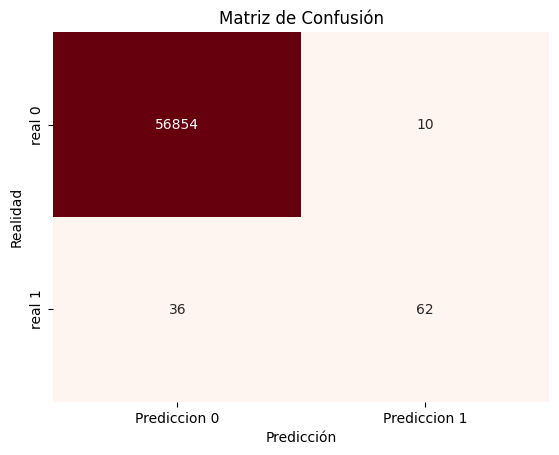


Accuracy: 0.9991924440855307
Recall: 0.6326530612244898
F1 Score: 0.7294117647058823
AUC-ROC Score: 0.8162386015182663


In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, roc_auc_score
y_pred = model.predict(X_test)


conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Crea un mapa de calor
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Reds", cbar=False,
            xticklabels=['Prediccion 0', 'Prediccion 1'],
            yticklabels=['real 0', 'real 1'])

plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()



# Calcular métricas de evaluación
accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
recall = recall_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
f1 = f1_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
roc_auc = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))

# Imprimir los resultados

print("\nAccuracy:", accuracy)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC-ROC Score:", roc_auc)